# Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

1.4.4
1.21.5
0.11.2


# Load Dataset

In [4]:
df = pd.read_csv('loan_data_2007_2014.csv',low_memory=False)

# Mengatur opsi display.max_columns ke None
pd.set_option('display.max_columns', None)

df.sample(5)

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
166031      166031   3293424    4066639       2000         2000   
42570        42570  10079565   11931181      14825        14825   
17081        17081    722491     917331      12000        12000   
2569          2569   1034552    1264374       5000         5000   
377929      377929  17643029   19775579       5000         5000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
166031           2000.0   36 months     22.47        76.87     E        E5   
42570           14825.0   36 months     18.25       537.83     D        D3   
17081           12000.0   60 months     14.17       280.28     C        C5   
2569             5000.0   36 months     13.49       169.66     C        C1   
377929           5000.0   36 months     12.49       167.25     B        B5   

                            emp_title emp_length home_ownership  annual_inc  \
166031            Lowe's Home Centers   < 1 year           RENT     17000.0   
42570                         Manager   < 1 year           RENT    175000.0   
17081         STS Property Management    6 years       MORTGAGE     48000.0   
2569    Car sound exhaust systems inc    6 years           RENT     40752.0   
377929          Operations Supervisor    4 years       MORTGAGE     50000.0   

       verification_status issue_d      loan_status pymnt_plan  \
166031        Not Verified  Feb-13          Current          n   
42570             Verified  Dec-13  In Grace Period          n   
17081         Not Verified  Apr-11       Fully Paid          n   
2569          Not Verified  Nov-11       Fully Paid          n   
377929            Verified  Jun-14          Current          n   

                                                      url  \
166031  https://www.lendingclub.com/browse/loanDetail....   
42570   https://www.lendingclub.com/browse/loanDetail....   
17081   https://www.lendingclub.com/browse/loanDetail....   
2569    https://www.lendingclub.com/browse/loanDetail....   
377929  https://www.lendingclub.com/browse/loanDetail....   

                                                     desc             purpose  \
166031    Borrower added on 02/02/13 > I am proposing ...  debt_consolidation   
42570                                                 NaN      small_business   
17081     Borrower added on 04/07/11 > Updating a Kitc...    home_improvement   
2569                                                  NaN               other   
377929                                                NaN    home_improvement   

                     title zip_code addr_state    dti  delinq_2yrs  \
166031  Debt Consolidation    483xx         MI  22.45          0.0   
42570             Business    303xx         GA   8.07          0.0   
17081     Home Improvement    436xx         OH  13.63          0.0   
2569             personal     926xx         CA  23.50          0.0   
377929    Home improvement    442xx         OH  15.05          0.0   

       earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
166031           Aug-09             0.0                     NaN   
42570            Sep-89             0.0                     NaN   
17081            Oct-00             1.0                    52.0   
2569             May-07             1.0                     NaN   
377929           Dec-82             1.0                    39.0   

        mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
166031                     NaN       6.0      0.0       3216        84.6   
42570                     63.0       7.0      1.0      10249        22.0   
17081                      NaN       8.0      0.0       5700        63.3   
2569                       NaN      12.0      0.0       4475        40.0   
377929                    52.0       6.0      1.0       2127        19.0   

        total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
166031        7.0                   f      75.84

# Exploratory Data Analysis

## Descriptive Analytics

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [37]:
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [14]:
# Counting the number of unique values in each column
unique_counts = df.nunique()

# Applying filtering to columns with less than 10 unique values
filtered_columns = unique_counts[(unique_counts < 10) & (unique_counts > 0)]

# Displaying the number of unique values for the filtered columns
filtered_columns

term                          2
grade                         7
home_ownership                6
verification_status           3
loan_status                   9
pymnt_plan                    2
initial_list_status           2
collections_12_mths_ex_med    9
policy_code                   1
application_type              1
acc_now_delinq                6
dtype: int64

In [17]:
# Applying the filter to columns with fewer than 10 unique values
filtered_columns = filtered_columns.index.tolist()

In [21]:
# Displaying the unique values of each column in filtered_columns
for column in filtered_columns:
    unique_values = df[column].unique()
    print(f"Unique values of column '{column}':")
    print(unique_values)
    print()

Unique values of column 'term':
[' 36 months' ' 60 months']

Unique values of column 'grade':
['B' 'C' 'A' 'E' 'F' 'D' 'G']

Unique values of column 'home_ownership':
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

Unique values of column 'verification_status':
['Verified' 'Source Verified' 'Not Verified']

Unique values of column 'loan_status':
['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']

Unique values of column 'pymnt_plan':
['n' 'y']

Unique values of column 'initial_list_status':
['f' 'w']

Unique values of column 'collections_12_mths_ex_med':
[ 0. nan  1.  2.  4.  3.  6. 16. 20.  5.]

Unique values of column 'policy_code':
[1]

Unique values of column 'application_type':
['INDIVIDUAL']

Unique values of column 'acc_now_delinq':
[ 0.  1. nan  2.  3.  5.  4.]



In [30]:
# Separating columns based on data types
object_cols = df[filtered_columns].select_dtypes(include=['object']).columns
numeric_cols = df[filtered_columns].select_dtypes(include=['int', 'float']).columns

print('Object columns:\n', list(object_cols), '\n')
#print('Date columns:\n', list(date), '\n')
print('Numeric columns:\n', list(numeric_cols))

Kolom tipe objek:
 ['term', 'grade', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'initial_list_status', 'application_type'] 

Kolom tipe numerik:
 ['collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq']


In [31]:
# Statistical description of categorical columns
df[object_cols].describe()

term   grade home_ownership verification_status loan_status  \
count       466285  466285         466285              466285      466285   
unique           2       7              6                   3           9   
top      36 months       B       MORTGAGE            Verified     Current   
freq        337953  136929         235875              168055      224226   

       pymnt_plan initial_list_status application_type  
count      466285              466285           466285  
unique          2                   2                1  
top             n                   f       INDIVIDUAL  
freq       466276              303005           466285

In [32]:
df.describe()

Unnamed: 0            id     member_id      loan_amnt  \
count  466285.000000  4.662850e+05  4.662850e+05  466285.000000   
mean   233142.000000  1.307973e+07  1.459766e+07   14317.277577   
std    134605.029472  1.089371e+07  1.168237e+07    8286.509164   
min         0.000000  5.473400e+04  7.047300e+04     500.000000   
25%    116571.000000  3.639987e+06  4.379705e+06    8000.000000   
50%    233142.000000  1.010790e+07  1.194108e+07   12000.000000   
75%    349713.000000  2.073121e+07  2.300154e+07   20000.000000   
max    466284.000000  3.809811e+07  4.086083e+07   35000.000000   

         funded_amnt  funded_amnt_inv       int_rate    installment  \
count  466285.000000    466285.000000  466285.000000  466285.000000   
mean    14291.801044     14222.329888      13.829236     432.061201   
std      8274.371300      8297.637788       4.357587     243.485550   
min       500.000000         0.000000       5.420000      15.670000   
25%      8000.000000      8000.000000      10.990000     256.690000   
50%     12000.000000     12000.000000      13.660000     379.890000   
75%     20000.000000     19950.000000      16.490000     566.580000   
max     35000.000000     35000.000000      26.060000    1409.990000   

         annual_inc            dti    delinq_2yrs  inq_last_6mths  \
count  4.662810e+05  466285.000000  466256.000000   466256.000000   
mean   7.327738e+04      17.218758       0.284678        0.804745   
std    5.496357e+04       7.851121       0.797365        1.091598   
min    1.896000e+03       0.000000       0.000000        0.000000   
25%    4.500000e+04      11.360000       0.000000        0.000000   
50%    6.300000e+04      16.870000       0.000000        0.000000   
75%    8.896000e+04      22.780000       0.000000        1.000000   
max    7.500000e+06      39.990000      29.000000       33.000000   

       mths_since_last_delinq  mths_since_last_record       open_acc  \
count           215934.000000            62638.000000  466256.000000   
mean                34.104430               74.306012      11.187069   
std                 21.778487               30.357653       4.987526   
min                  0.000000                0.000000       0.000000   
25%                 16.000000               53.000000       8.000000   
50%                 31.000000               76.000000      10.000000   
75%                 49.000000              102.000000      14.000000   
max                188.000000              129.000000      84.000000   

             pub_rec     revol_bal     revol_util      total_acc  \
count  466256.000000  4.662850e+05  465945.000000  466256.000000   
mean        0.160564  1.623020e+04      56.176947      25.064430   
std         0.510863  2.067625e+04      23.732628      11.600141   
min         0.000000  0.000000e+00       0.000000       1.000000   
25%         0.000000  6.413000e+03      39.200000      17.000000   
50%         0.000000  1.176400e+04      57.600000      23.000000   
75%         0.000000  2.033300e+04      74.700000      32.000000   
max        63.000000  2.568995e+06     892.300000     156.000000   

           out_prncp  out_prncp_inv    total_pymnt  total_pymnt_inv  \
count  466285.000000  466285.000000  466285.000000    466285.000000   
mean     4410.062342    4408.452258   11540.686220     11469.892747   
std      6355.078769    6353.198001    8265.627112      8254.157579   
min         0.000000       0.000000       0.000000         0.000000   
25%         0.000000       0.000000    5552.125349      5499.250000   
50%       441.470000     441.380000    9419.250943      9355.430000   
75%      7341.650000    7338.390000   15308.158460     15231.310000   
max     32160.380000   32160.380000   57777.579870     57777.580000   

       total_rec_prncp  total_rec_int  total_rec_late_fee     recoveries  \
count    466285.000000  466285.000000       466285.000000  466285.000000   
mean       8866.014657    2588.677225            0.650129      85.344211   
std        703

## Univariate Analysis

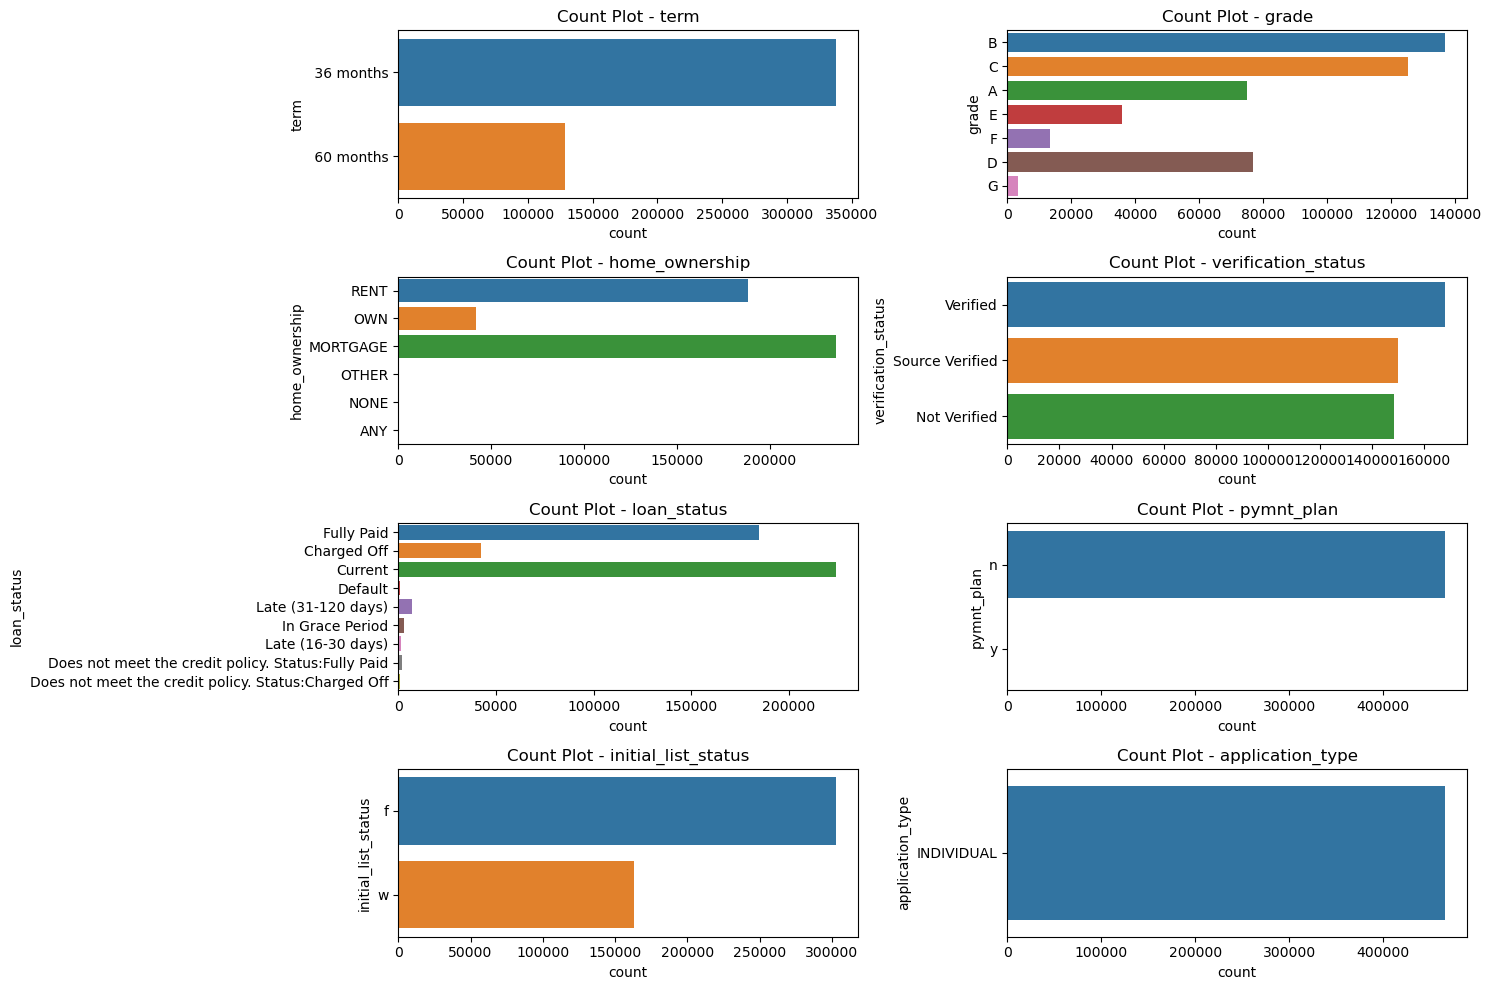

In [38]:
# Determining the number of rows and columns for subplots
num_plots = len(object_cols)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Setting up a counter for plots
counter = 0

# Creating horizontal count plots for each object column
for row in range(num_rows):
    for col in range(num_cols):
        if counter < num_plots:
            col_name = object_cols[counter]
            sns.countplot(data=df, y=col_name, ax=axes[row, col], orient='h')
            axes[row, col].set_title(f"Count Plot - {col_name}")
            counter += 1
        else:
            # If the counter exceeds the number of object columns, remove the remaining subplot
            fig.delaxes(axes[row, col])

# Adjusting the layout of subplots
plt.tight_layout()

# Displaying the plot
plt.show()

In [20]:
# 15 Choosen Columns
selected_columns = ['loan_status','loan_amnt', 'int_rate', 'installment', 'grade', 'home_ownership', 'annual_inc', 'verification_status', 'dti', 'delinq_2yrs', 'total_acc', 'revol_bal', 'pub_rec', 'emp_length', 'collections_12_mths_ex_med']

In [22]:
selected_df = df[selected_columns]
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_status                 466285 non-null  object 
 1   loan_amnt                   466285 non-null  int64  
 2   int_rate                    466285 non-null  float64
 3   installment                 466285 non-null  float64
 4   grade                       466285 non-null  object 
 5   home_ownership              466285 non-null  object 
 6   annual_inc                  466285 non-null  float64
 7   verification_status         466285 non-null  object 
 8   dti                         466285 non-null  float64
 9   delinq_2yrs                 466285 non-null  float64
 10  total_acc                   466285 non-null  float64
 11  revol_bal                   466285 non-null  int64  
 12  pub_rec                     466285 non-null  float64
 13  emp_length    

In [21]:
# Create a pair plot of all features based on the cluster results
sns.pairplot(df, vars=num_list, hue='loan_status')
plt.show()

loan_amnt       int_rate    installment    annual_inc  \
count  466285.000000  466285.000000  466285.000000  4.662850e+05   
mean    14317.277577      13.829236     432.061201  7.327738e+04   
std      8286.509164       4.357587     243.485550  5.496333e+04   
min       500.000000       5.420000      15.670000  1.896000e+03   
25%      8000.000000      10.990000     256.690000  4.500000e+04   
50%     12000.000000      13.660000     379.890000  6.300000e+04   
75%     20000.000000      16.490000     566.580000  8.895300e+04   
max     35000.000000      26.060000    1409.990000  7.500000e+06   

                 dti    delinq_2yrs     total_acc     revol_bal  \
count  466285.000000  466285.000000  466285.00000  4.662850e+05   
mean       17.218758       0.284678      25.06443  1.623020e+04   
std         7.851121       0.797340      11.59978  2.067625e+04   
min         0.000000       0.000000       1.00000  0.000000e+00   
25%        11.360000       0.000000      17.00000  6.413000e+03   
50%        16.870000       0.000000      23.00000  1.176400e+04   
75%        22.780000       0.000000      32.00000  2.033300e+04   
max        39.990000      29.000000     156.00000  2.568995e+06   

             pub_rec  collections_12_mths_ex_med  
count  466285.000000               466285.000000  
mean        0.160564                    0.009085  
std         0.510847                    0.108631  
min         0.000000                    0.000000  
25%         0.000000                    0.000000  
50%         0.000000                    0.000000  
75%         0.000000                    0.000000  
max        63.000000                   20.000000

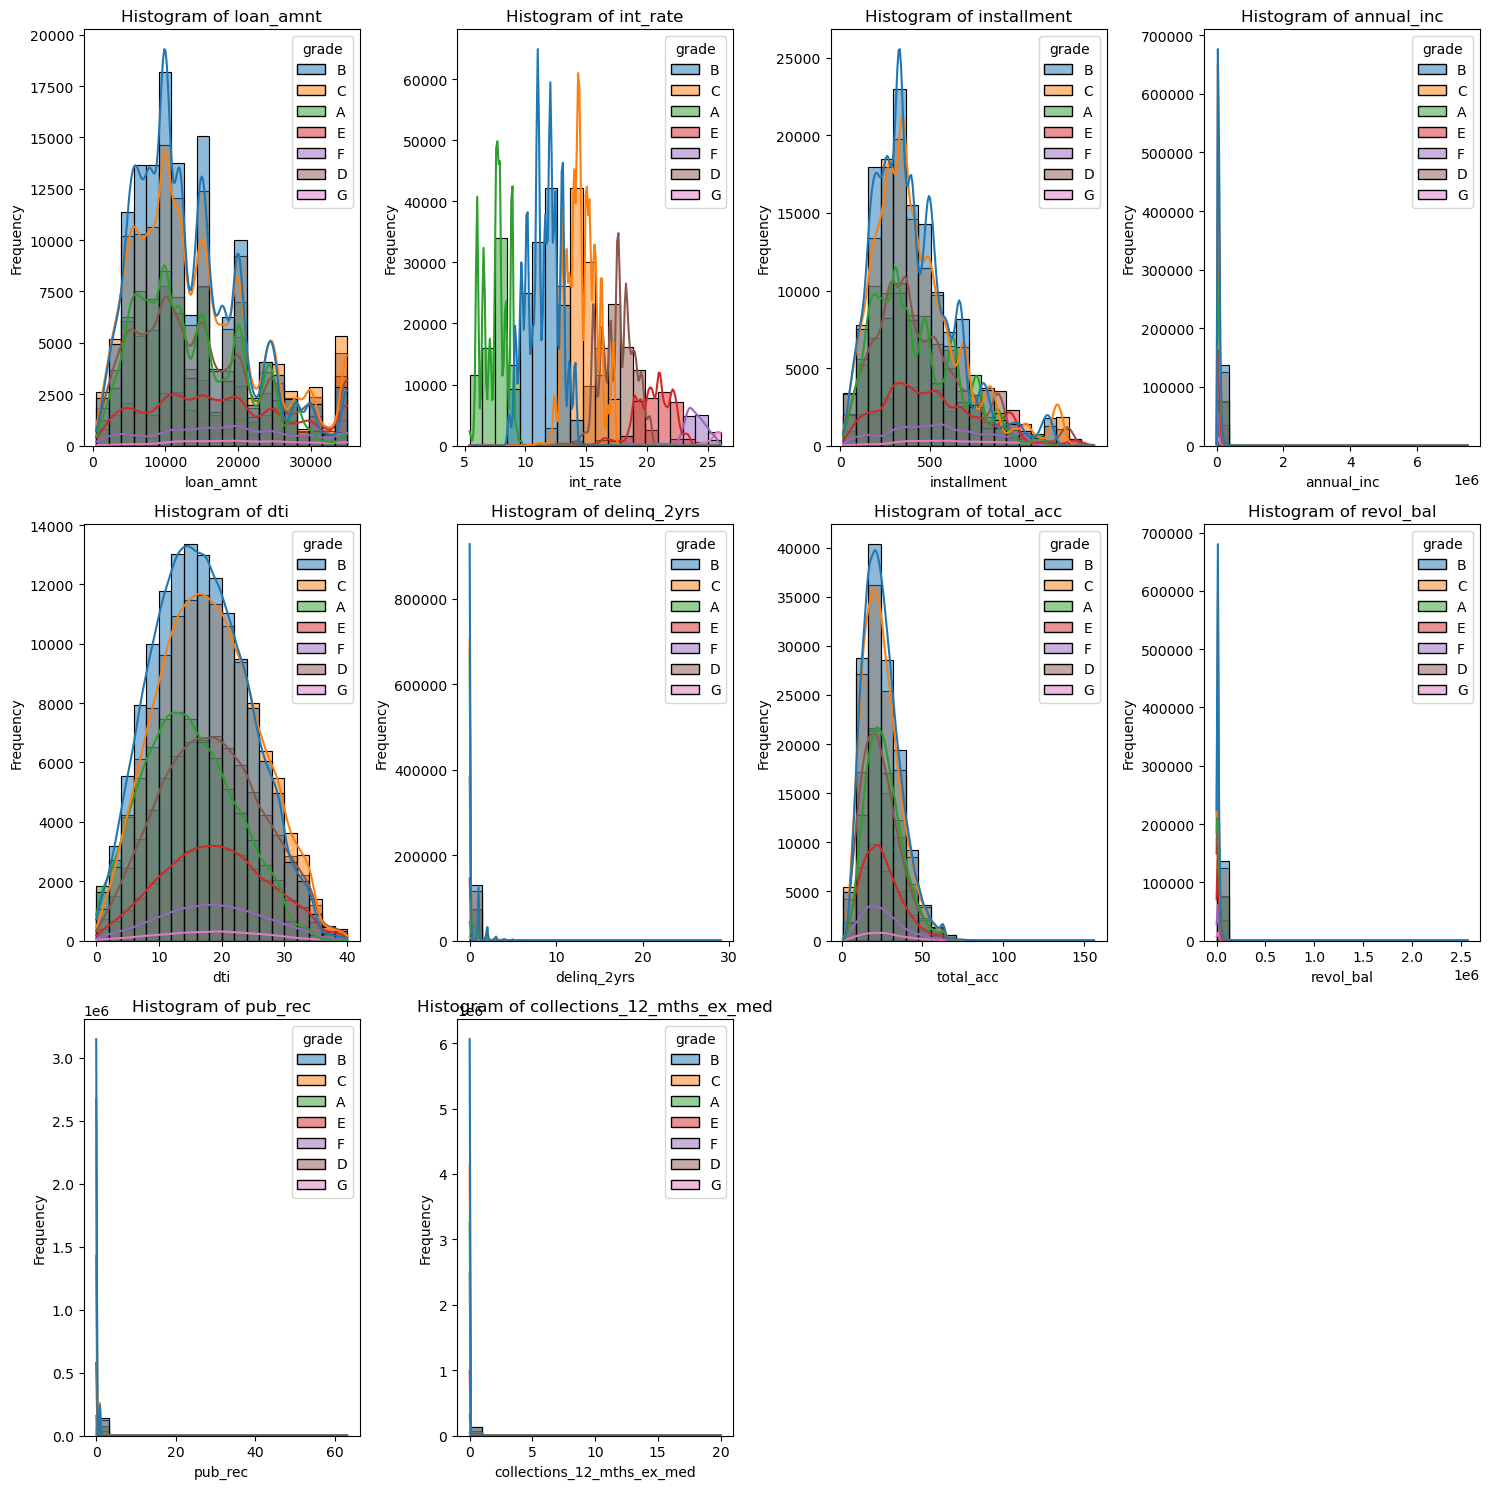

In [28]:
# Calculate the number of rows and columns for the subplot layout
n_rows = len(num_list) // 4 + (len(num_list) % 4 > 0)
n_cols = min(len(num_list), 4)

# Create histograms for each column with a 4-column layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Determine the number of unused subplots
unused_axes = n_rows * n_cols - len(num_list)

# Hide the unused subplots
if unused_axes > 0:
    for i in range(unused_axes):
        axes[-1, -i-1].axis('off')

# Create histograms for each column
for i, column in enumerate(num_list):
    ax = axes[i // n_cols, i % n_cols]
    sns.histplot(data=df, x=column, ax=ax, bins=20,hue='grade', kde=True)
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.set_title("Histogram of {}".format(column))

# Adjust the subplot layout
plt.tight_layout()

# Display the plot
plt.show()

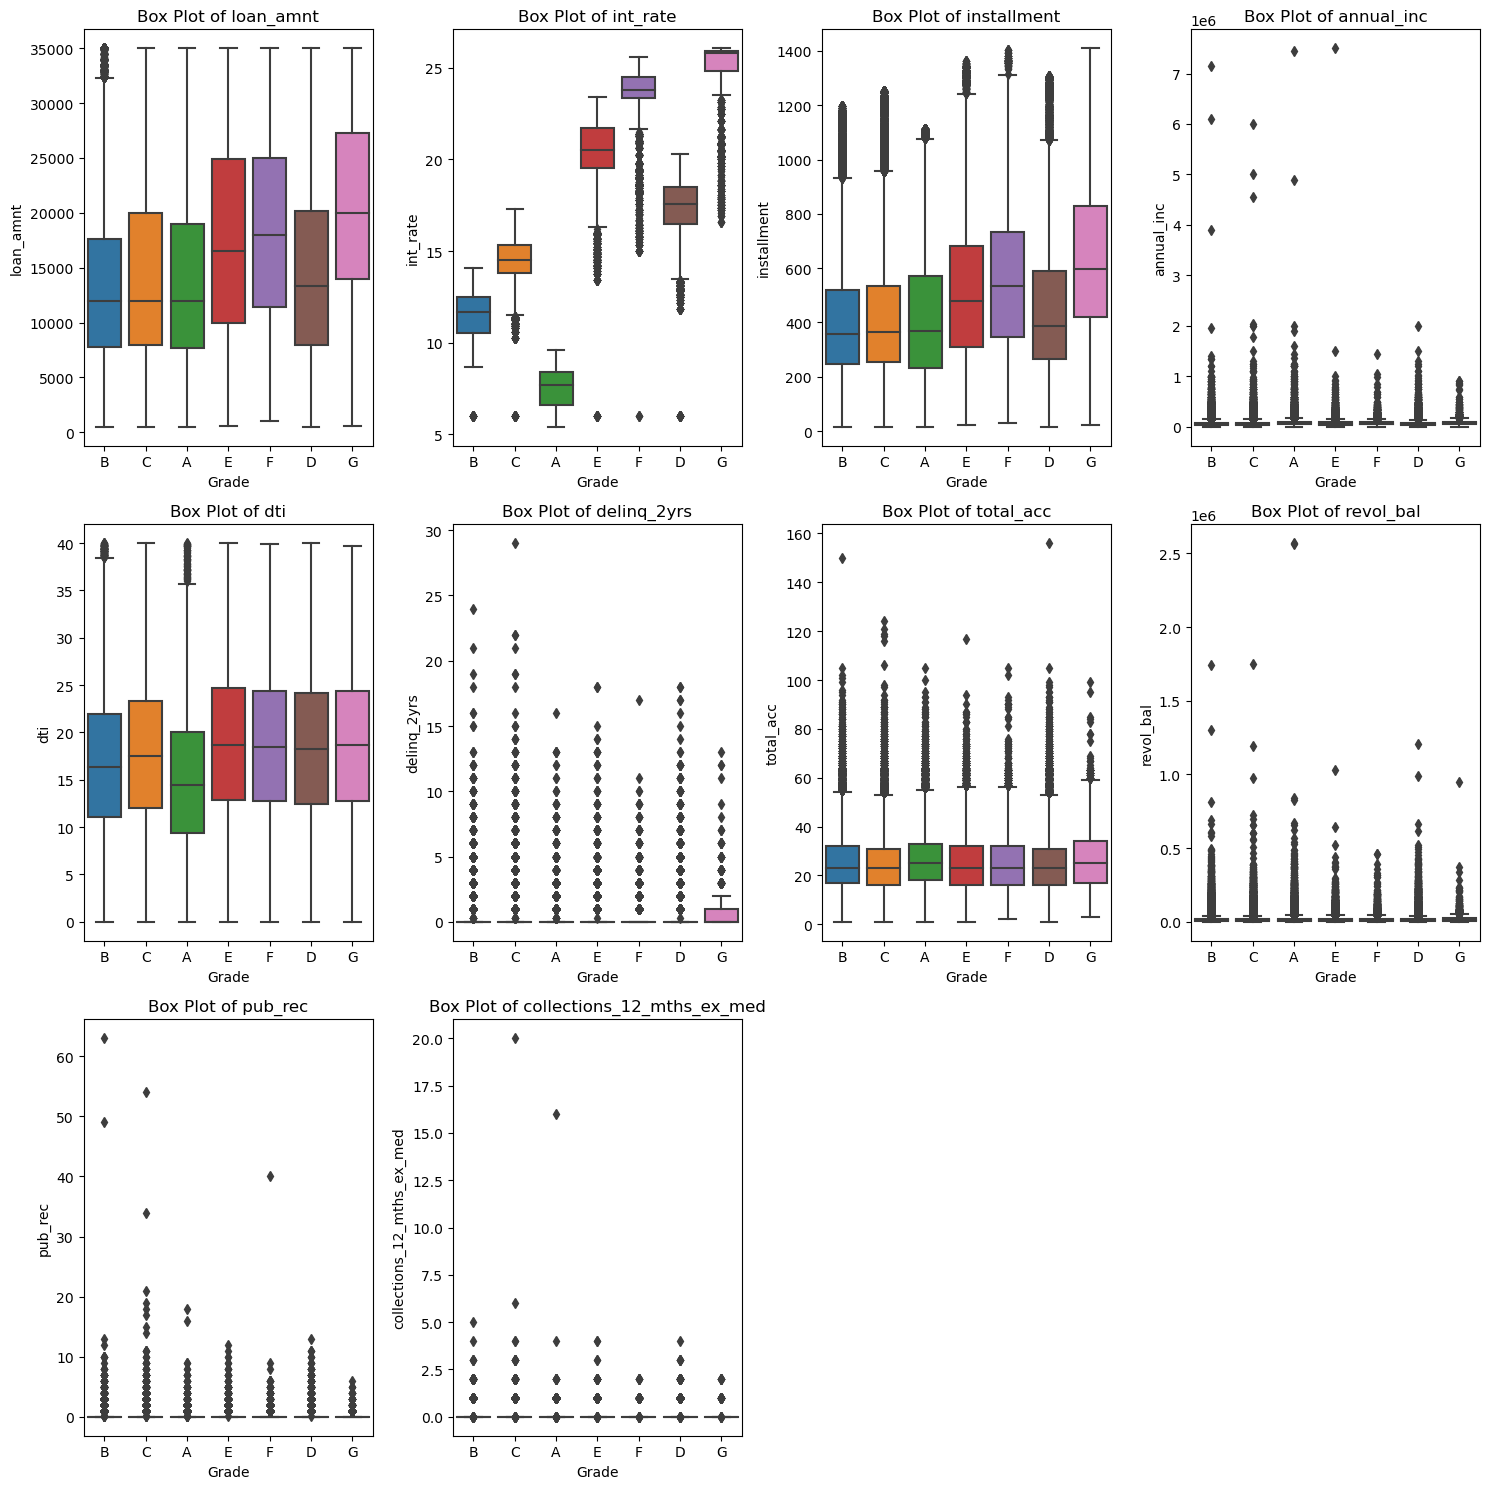

In [32]:
# Calculate the number of rows and columns for the subplot layout
n_rows = len(num_list) // 4 + (len(num_list) % 4 > 0)
n_cols = min(len(num_list), 4)

# Create box plots for each column with a 4-column layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Determine the number of unused subplots
unused_axes = n_rows * n_cols - len(num_list)

# Hide the unused subplots
if unused_axes > 0:
    for i in range(unused_axes):
        axes[-1, -i-1].axis('off')

# Create box plots for each column
for i, column in enumerate(num_list):
    ax = axes[i // n_cols, i % n_cols]
    sns.boxplot(data=df, x='grade', y=column, ax=ax)
    ax.set_xlabel("Grade")
    ax.set_ylabel(column)
    ax.set_title("Box Plot of {}".format(column))

# Adjust the subplot layout
plt.tight_layout()

# Display the plot
plt.show()

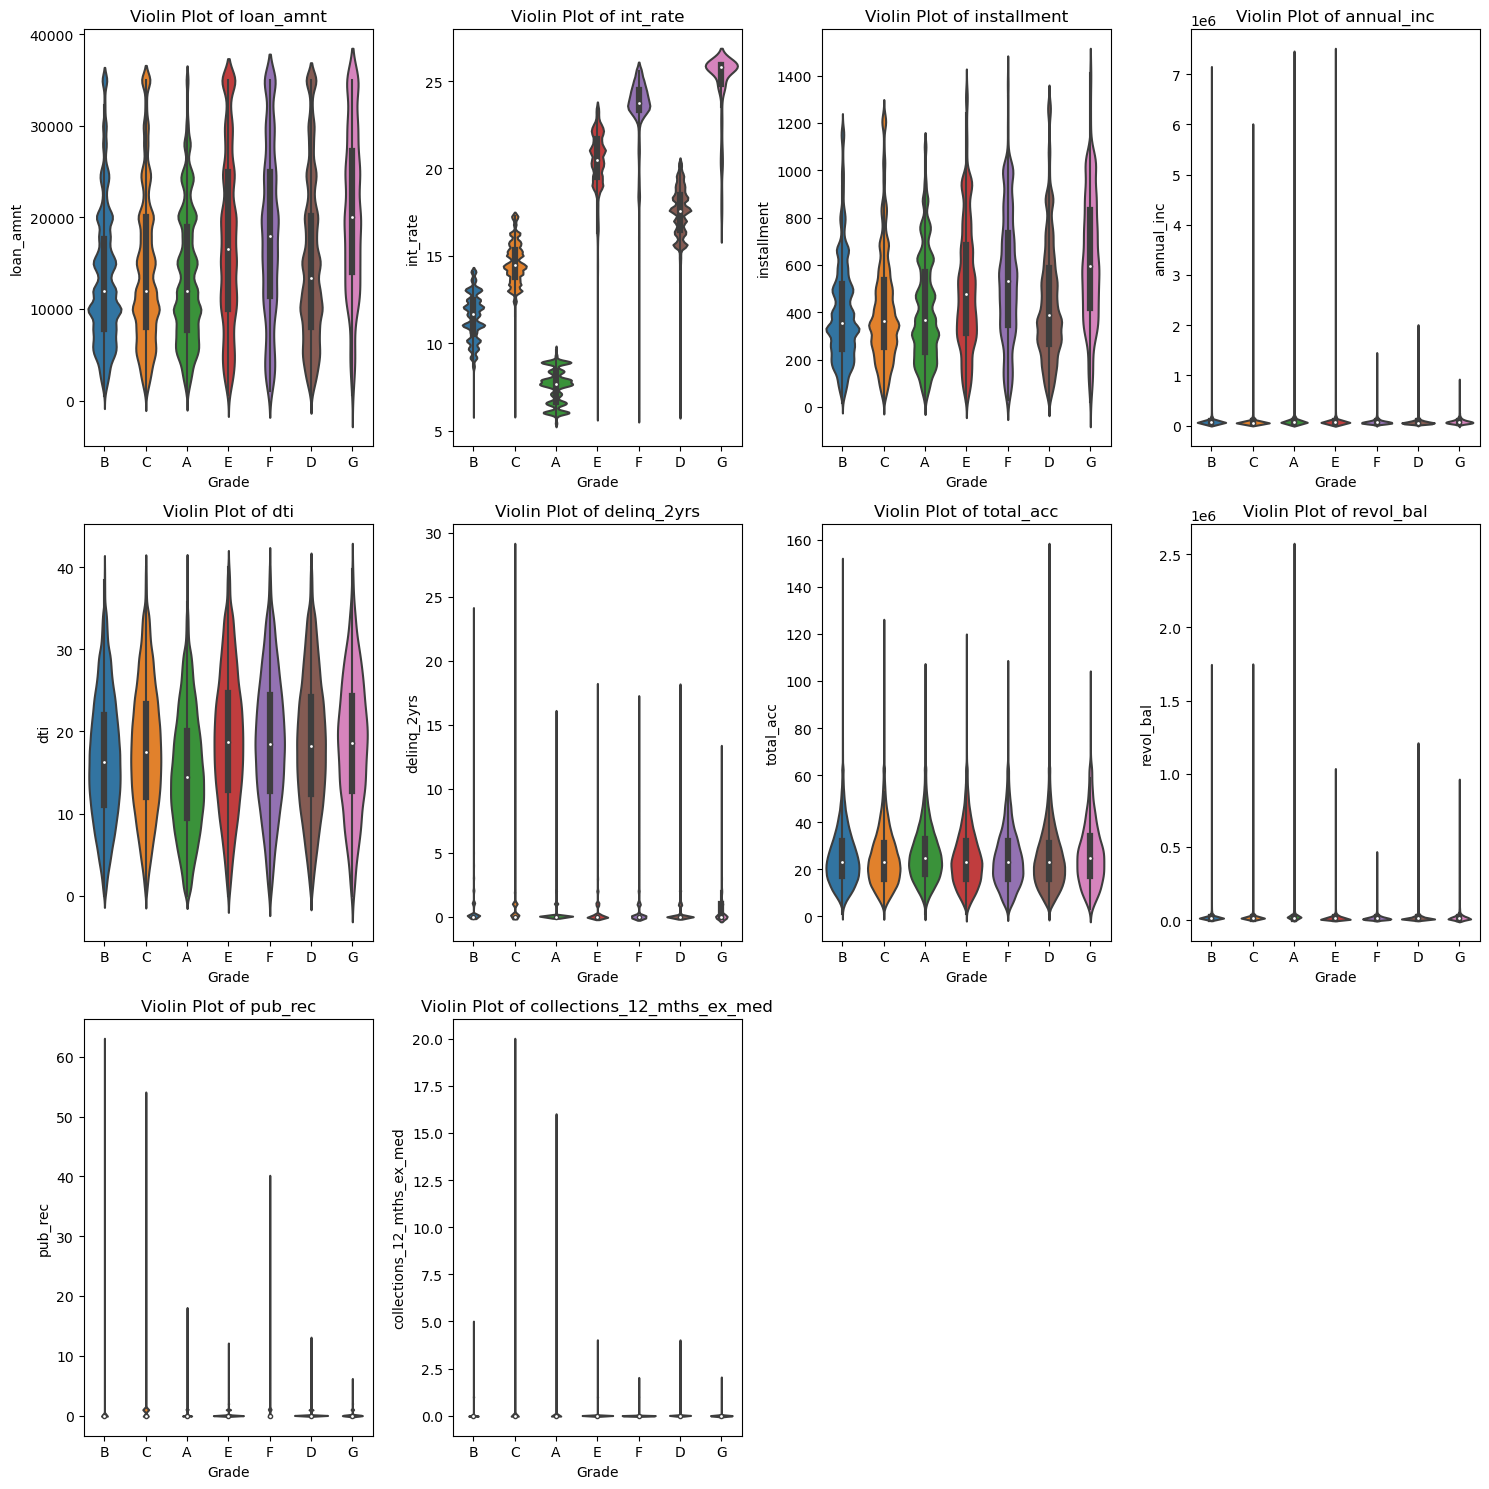

In [33]:
# Calculate the number of rows and columns for the subplot layout
n_rows = len(num_list) // 4 + (len(num_list) % 4 > 0)
n_cols = min(len(num_list), 4)

# Create violin plots for each column with a 4-column layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Determine the number of unused subplots
unused_axes = n_rows * n_cols - len(num_list)

# Hide the unused subplots
if unused_axes > 0:
    for i in range(unused_axes):
        axes[-1, -i-1].axis('off')

# Create violin plots for each column
for i, column in enumerate(num_list):
    ax = axes[i // n_cols, i % n_cols]
    sns.violinplot(data=df, x='grade', y=column, ax=ax)
    ax.set_xlabel("Grade")
    ax.set_ylabel(column)
    ax.set_title("Violin Plot of {}".format(column))

# Adjust the subplot layout
plt.tight_layout()

# Display the plot
plt.show()

## Bivariate Analysis

In [28]:
num_list = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'total_acc','revol_bal', 'pub_rec', 'collections_12_mths_ex_med']

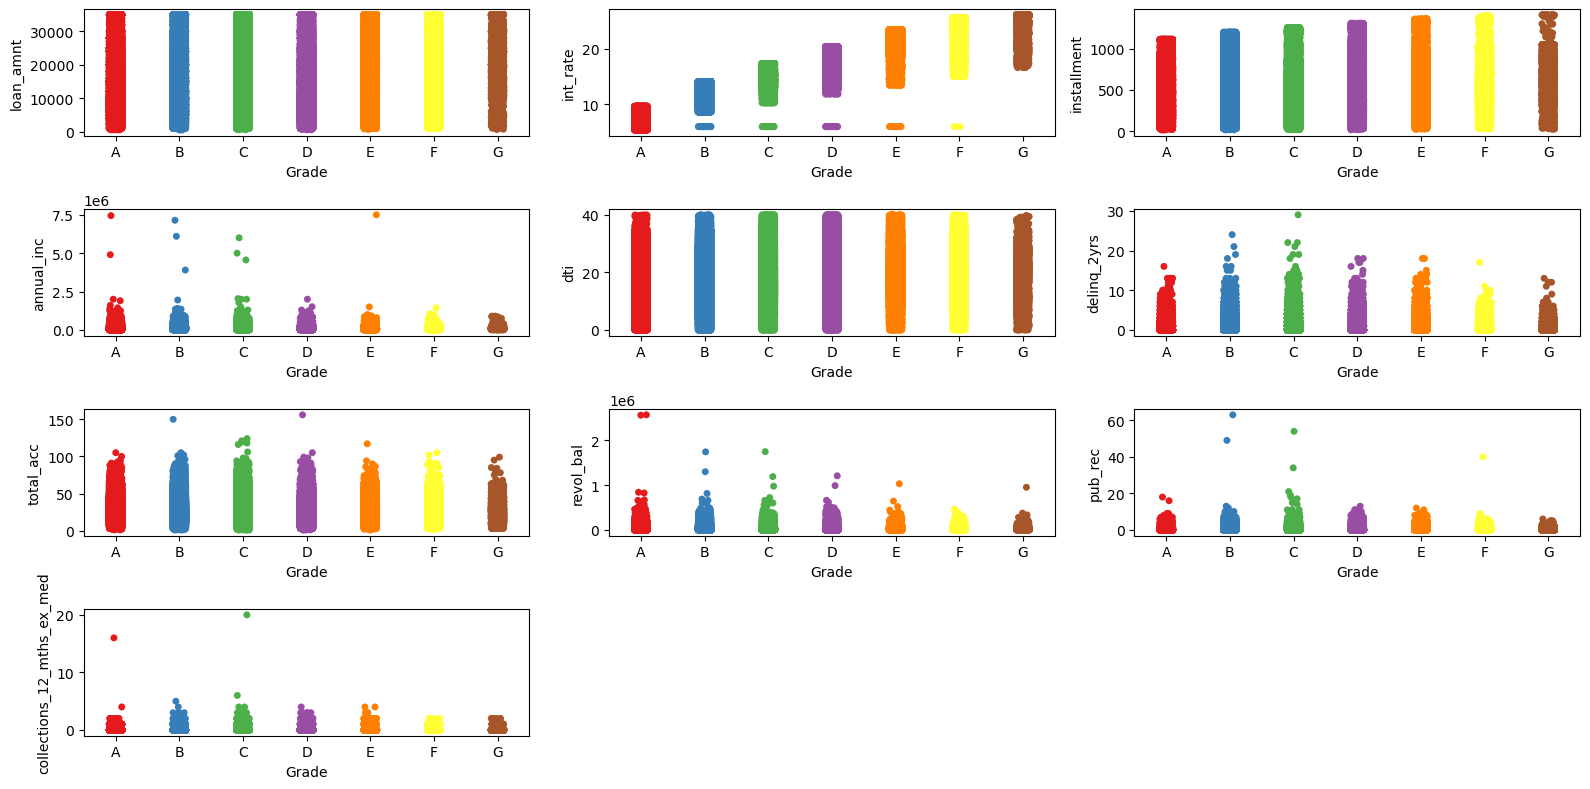

In [78]:

plt.figure(figsize=(16, 8))

for i in range(0, len(num_list)):
    plt.subplot(4, 3, i+1)
    sns.stripplot(x=df['grade'], y=df[num_list[i]],order=sorted(df['grade'].unique()), palette='Set1')
    plt.xticks(rotation=0)
    plt.xlabel('Grade')
    plt.ylabel(num_list[i])
    plt.tight_layout()

plt.show()


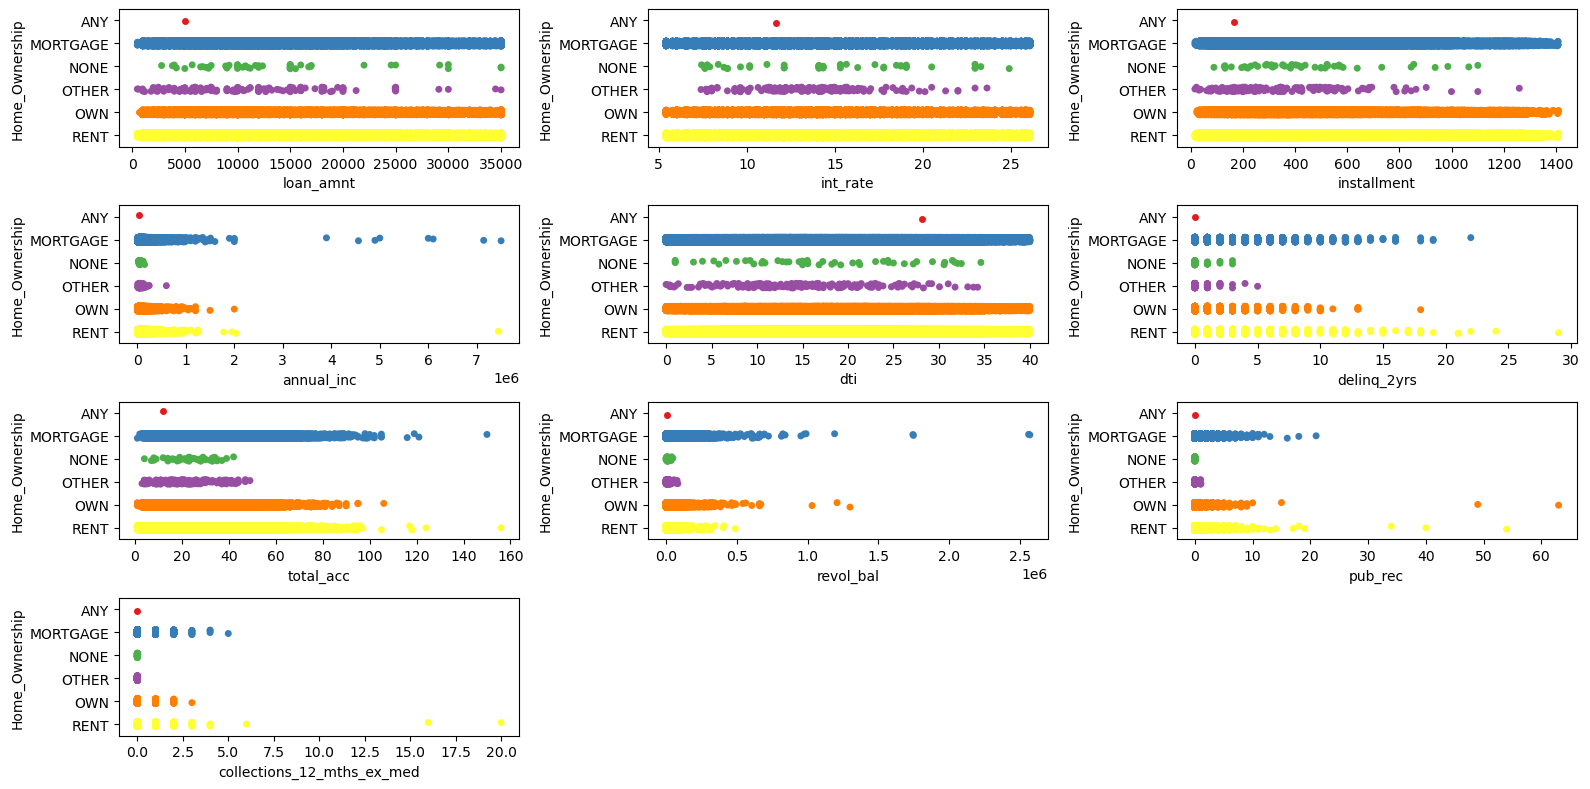

In [79]:
plt.figure(figsize=(16, 8))

for i in range(0, len(num_list)):
    plt.subplot(4, 3, i+1)
    sns.stripplot(y=df['home_ownership'], x=df[num_list[i]],order=sorted(df['home_ownership'].unique()), palette='Set1')
    plt.xticks(rotation=0)
    plt.ylabel('Home_Ownership')
    plt.xlabel(num_list[i])
    plt.tight_layout()

plt.show()


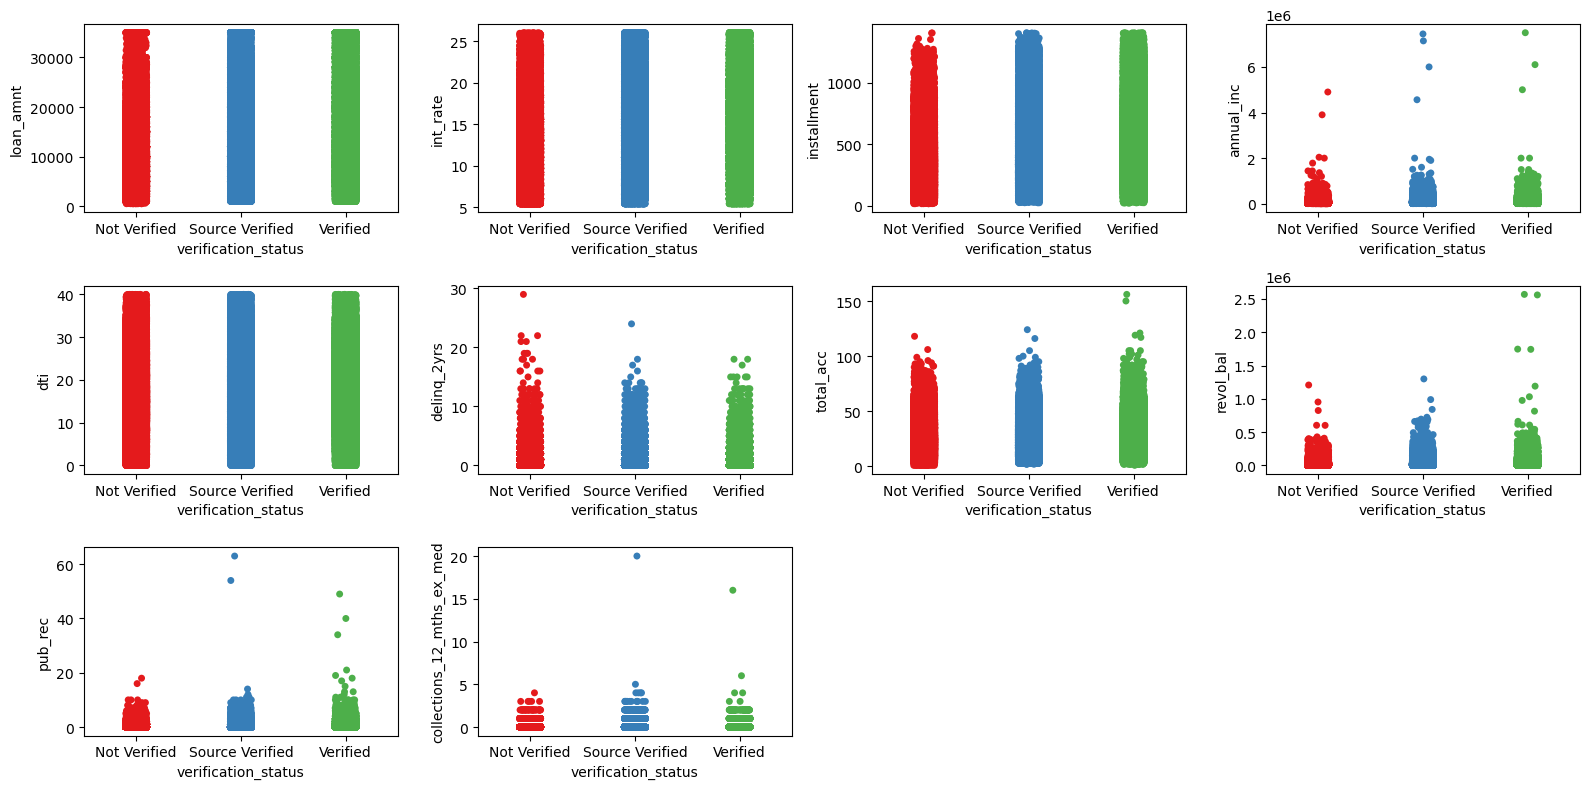

In [84]:
plt.figure(figsize=(16, 8))

for i in range(0, len(num_list)):
    plt.subplot(3, 4, i+1)
    sns.stripplot(x=df['verification_status'], y=df[num_list[i]],order=sorted(df['verification_status'].unique()), palette='Set1')
    plt.xticks(rotation=0)
    plt.xlabel('verification_status')
    plt.ylabel(num_list[i])
    plt.tight_layout()

plt.show()


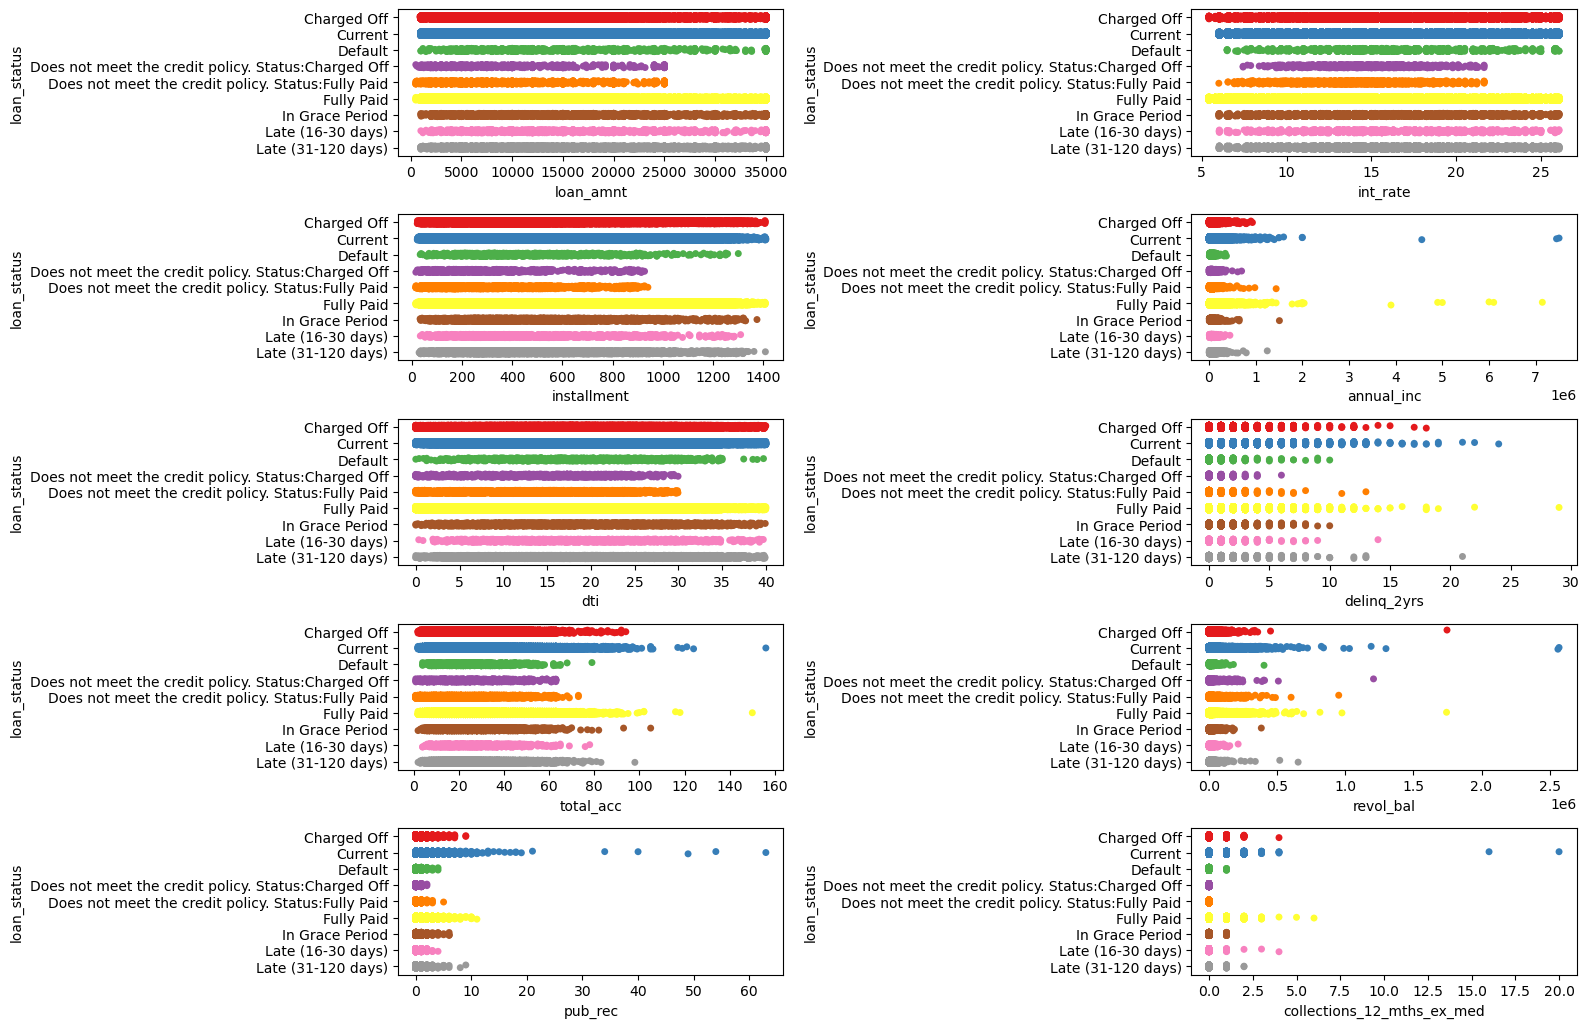

In [86]:
plt.figure(figsize=(16, 12))

for i in range(0, len(num_list)):
    plt.subplot(6, 2, i+1)
    sns.stripplot(y=df['loan_status'], x=df[num_list[i]],order=sorted(df['loan_status'].unique()), palette='Set1')
    plt.xticks(rotation=0)
    plt.ylabel('loan_status')
    plt.xlabel(num_list[i])
    plt.tight_layout()

plt.show()


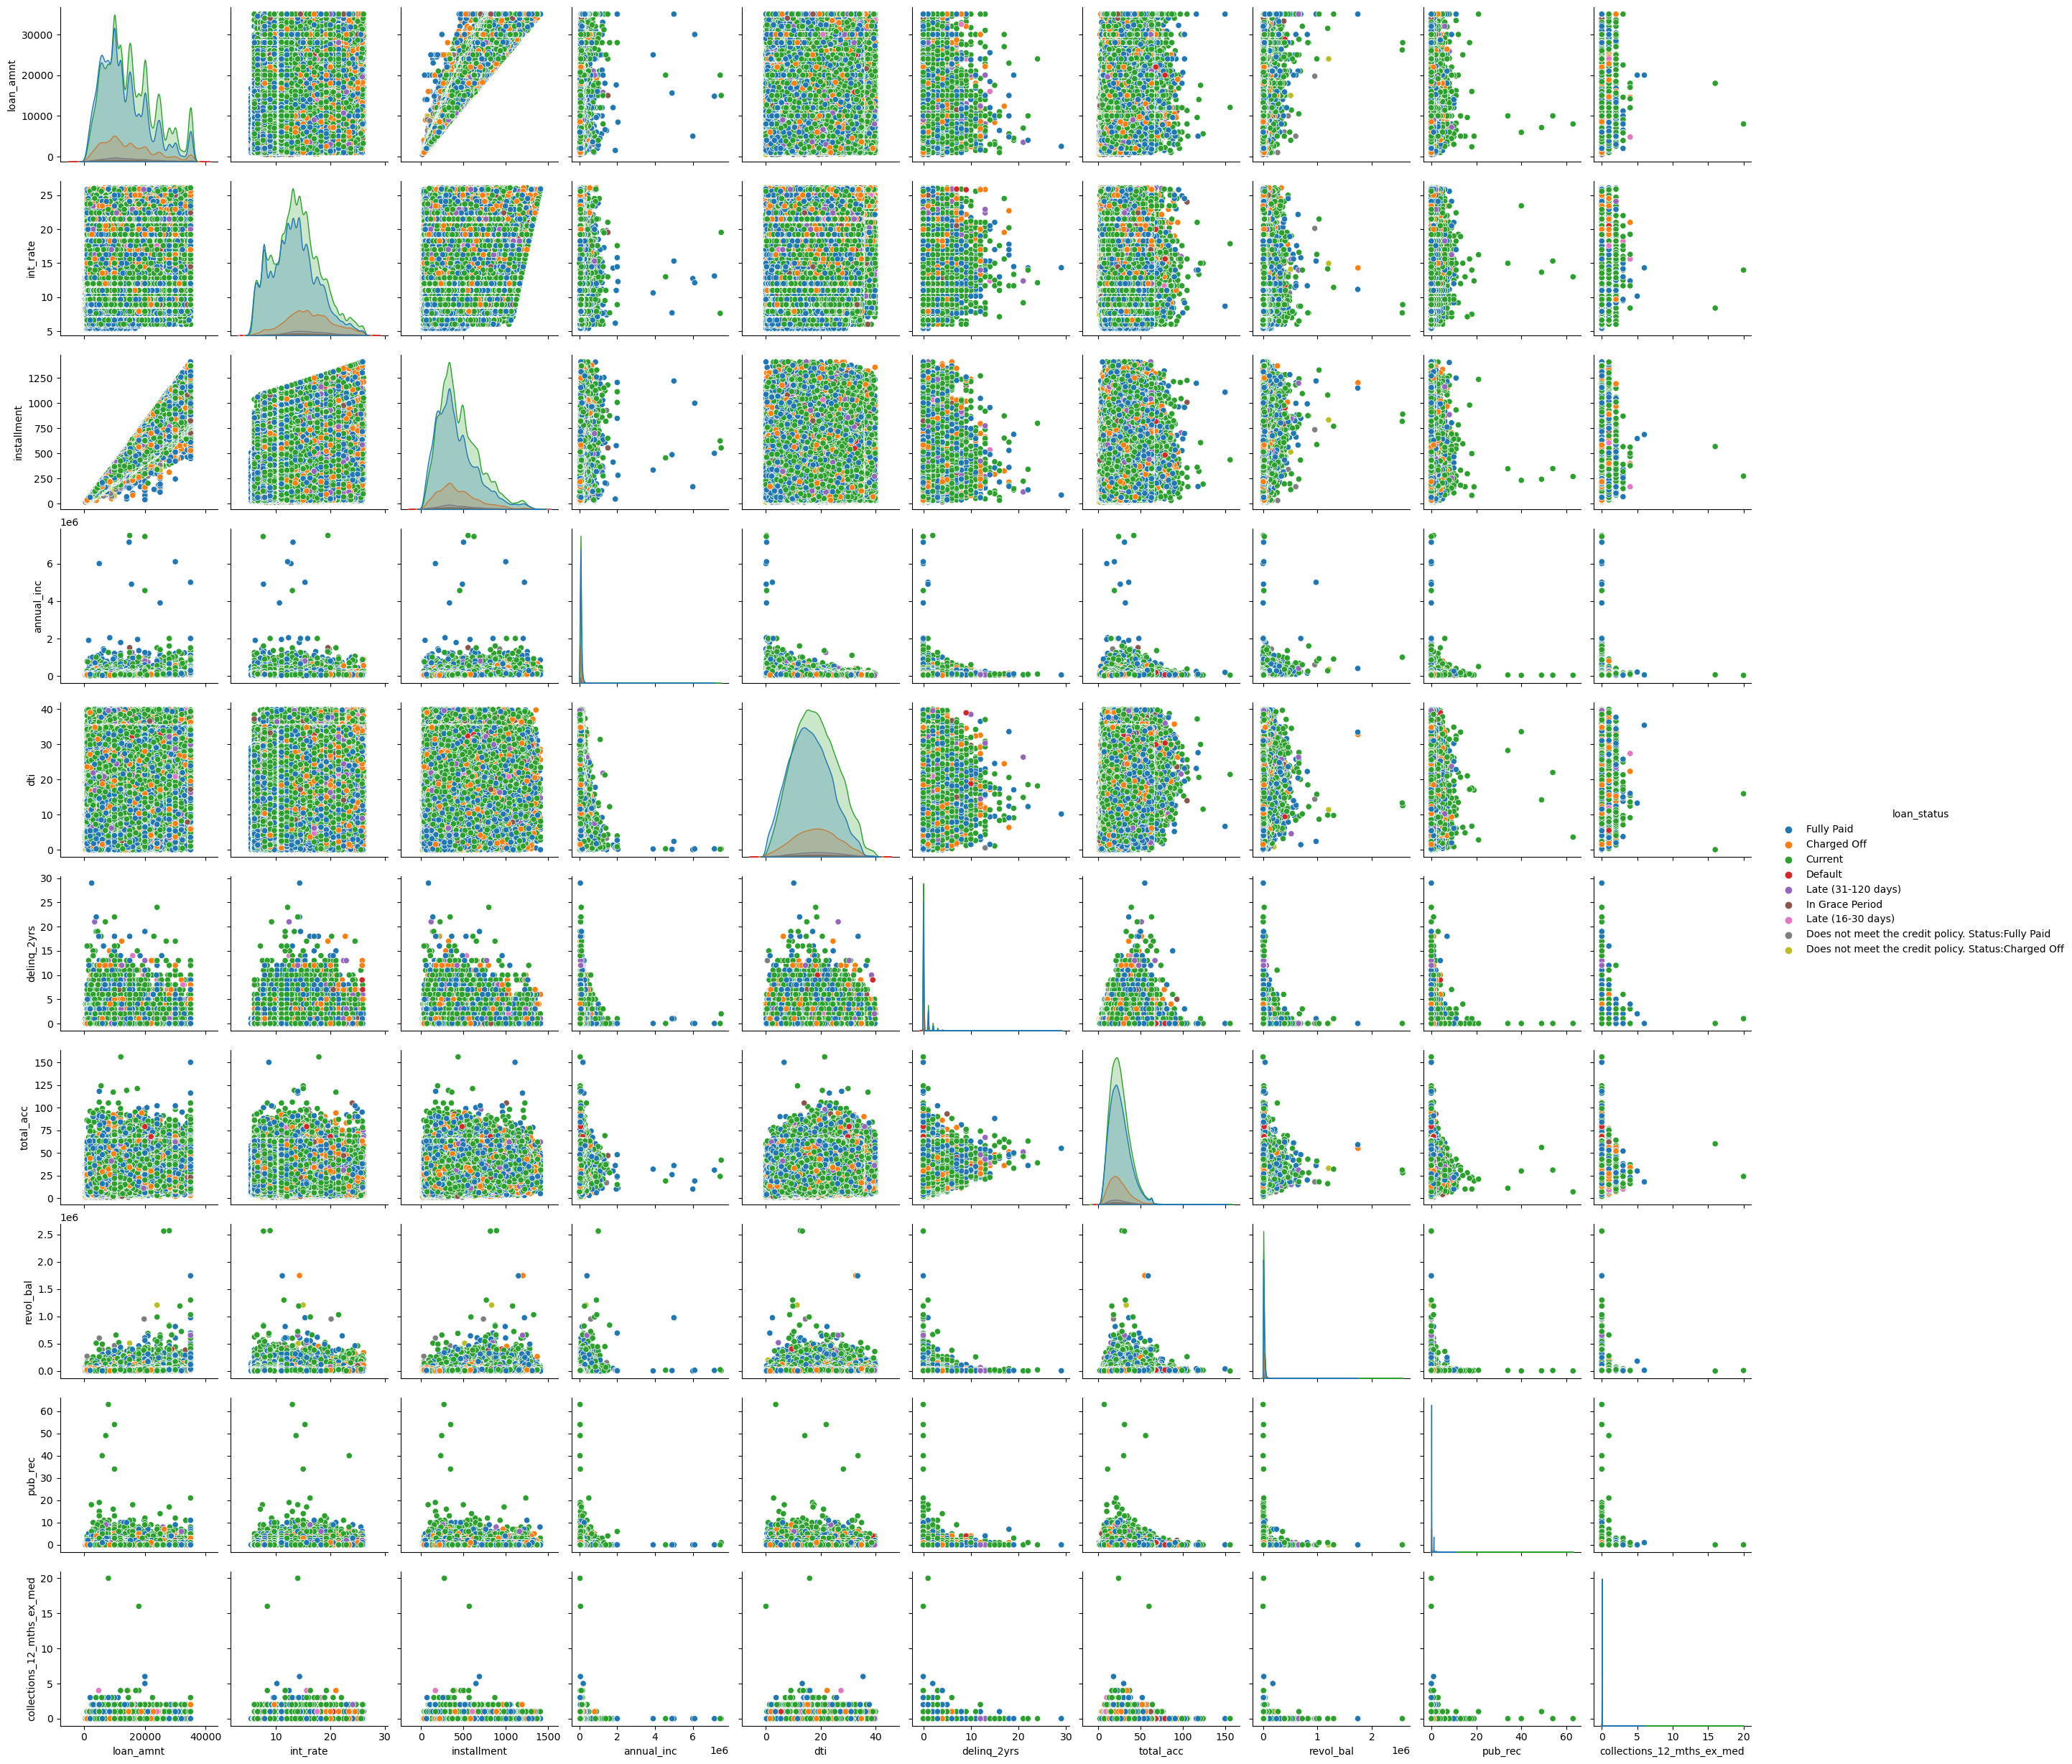

In [29]:
# Create a pair plot of all features based on the cluster results
sns.pairplot(df, vars=num_list, hue='loan_status')
plt.show()

## Multivariate Analysis

<AxesSubplot:>

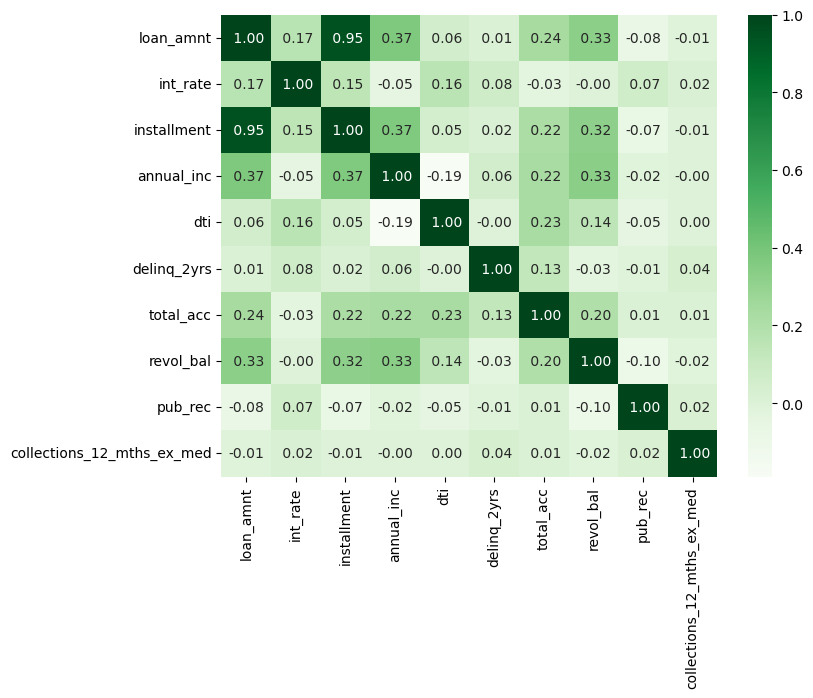

In [88]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_list].corr(), cmap="Greens", annot=True, fmt=' .2f')

# Preprocesing

## Missing Values

In [5]:
# 15 Choosen Columns
selected_columns = ['loan_status','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc',
    'revol_util','total_rec_late_fee','collection_recovery_fee','last_pymnt_amnt','mths_since_last_major_derog','tot_coll_amt',
    'tot_cur_bal','total_rev_hi_lim','emp_length', 'collections_12_mths_ex_med']

In [6]:
null_columns = df[selected_columns].columns[df[selected_columns].isnull().any()]
num_null_columns = len(null_columns)

# Display the result
if len(null_columns) > 0:
    print('Number of columns with null values:', num_null_columns)
    print('Kolom-kolom yang memiliki nilai null:', list(null_columns))
else:
    print('Tidak terdapat nilai null pada dataset')

Number of columns with null values: 12
Kolom-kolom yang memiliki nilai null: ['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'revol_util', 'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length', 'collections_12_mths_ex_med']


In [7]:
# Null rows
df[null_columns].isna().sum()

annual_inc                          4
delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq         250351
open_acc                           29
revol_util                        340
mths_since_last_major_derog    367311
tot_coll_amt                    70276
tot_cur_bal                     70276
total_rev_hi_lim                70276
emp_length                      21008
collections_12_mths_ex_med        145
dtype: int64

In [8]:
# Calculate the percentage of null values in each column
null_percentage = df[null_columns].isnull().sum() / len(df) * 100

# Display the result
print('Percentage of null values in each column:')
null_percentage


Percentage of null values in each column:


annual_inc                      0.000858
delinq_2yrs                     0.006219
inq_last_6mths                  0.006219
mths_since_last_delinq         53.690554
open_acc                        0.006219
revol_util                      0.072917
mths_since_last_major_derog    78.773926
tot_coll_amt                   15.071469
tot_cur_bal                    15.071469
total_rev_hi_lim               15.071469
emp_length                      4.505399
collections_12_mths_ex_med      0.031097
dtype: float64

### Handling Missing Value

In [9]:
null_columns = null_columns.drop(['mths_since_last_delinq', 'mths_since_last_major_derog'])

In [10]:
# Null Column Information
df[null_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   annual_inc                  466281 non-null  float64
 1   delinq_2yrs                 466256 non-null  float64
 2   inq_last_6mths              466256 non-null  float64
 3   open_acc                    466256 non-null  float64
 4   revol_util                  465945 non-null  float64
 5   tot_coll_amt                396009 non-null  float64
 6   tot_cur_bal                 396009 non-null  float64
 7   total_rev_hi_lim            396009 non-null  float64
 8   emp_length                  445277 non-null  object 
 9   collections_12_mths_ex_med  466140 non-null  float64
dtypes: float64(9), object(1)
memory usage: 35.6+ MB


In [11]:
# Numerical Null Column Desctriptive Statistics 
df[null_columns].describe()

annual_inc    delinq_2yrs  inq_last_6mths       open_acc  \
count  4.662810e+05  466256.000000   466256.000000  466256.000000   
mean   7.327738e+04       0.284678        0.804745      11.187069   
std    5.496357e+04       0.797365        1.091598       4.987526   
min    1.896000e+03       0.000000        0.000000       0.000000   
25%    4.500000e+04       0.000000        0.000000       8.000000   
50%    6.300000e+04       0.000000        0.000000      10.000000   
75%    8.896000e+04       0.000000        1.000000      14.000000   
max    7.500000e+06      29.000000       33.000000      84.000000   

          revol_util  tot_coll_amt   tot_cur_bal  total_rev_hi_lim  \
count  465945.000000  3.960090e+05  3.960090e+05      3.960090e+05   
mean       56.176947  1.919135e+02  1.388017e+05      3.037909e+04   
std        23.732628  1.463021e+04  1.521147e+05      3.724713e+04   
min         0.000000  0.000000e+00  0.000000e+00      0.000000e+00   
25%        39.200000  0.000000e+00  2.861800e+04      1.350000e+04   
50%        57.600000  0.000000e+00  8.153900e+04      2.280000e+04   
75%        74.700000  0.000000e+00  2.089530e+05      3.790000e+04   
max       892.300000  9.152545e+06  8.000078e+06      9.999999e+06   

       collections_12_mths_ex_med  
count               466140.000000  
mean                     0.009085  
std                      0.108648  
min                      0.000000  
25%                      0.000000  
50%                      0.000000  
75%                      0.000000  
max                     20.000000

In [12]:
# Categorical Null Column Desctriptive Statistics
df['emp_length'].describe()

count        445277
unique           11
top       10+ years
freq         150049
Name: emp_length, dtype: object

In [13]:
#Imputatation for Numecial Null Columns
num_miss = null_columns.drop('emp_length')
for i in num_miss:
  mean_columns = df[i].mean()
  df[i] = df[i].fillna(mean_columns)

In [14]:
#Imputatation for Categorical Null Columns
cat_miss = ['emp_length']
for i in cat_miss:
  mode_columns = df[i].mode().iloc[0]
  df[i] = df[i].fillna(mode_columns)

In [15]:
#Re-Checking Null Columns
selected_columns = ['loan_status','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc',
    'revol_util','total_rec_late_fee','collection_recovery_fee','last_pymnt_amnt','tot_coll_amt',
    'tot_cur_bal','total_rev_hi_lim','emp_length', 'collections_12_mths_ex_med']
df[selected_columns].isna().sum()

loan_status                   0
int_rate                      0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
revol_util                    0
total_rec_late_fee            0
collection_recovery_fee       0
last_pymnt_amnt               0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
emp_length                    0
collections_12_mths_ex_med    0
dtype: int64

## Duplicates

In [16]:
duplicates = df[selected_columns].duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Display the result
if num_duplicates > 0:
    print('There are {} duplicate rows in the dataset.'.format(num_duplicates))
else:
    print('There are no duplicates in the dataset.')

There are no duplicates in the dataset.


## Feature Engineering

In [17]:
df[selected_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_status                 466285 non-null  object 
 1   int_rate                    466285 non-null  float64
 2   installment                 466285 non-null  float64
 3   annual_inc                  466285 non-null  float64
 4   dti                         466285 non-null  float64
 5   delinq_2yrs                 466285 non-null  float64
 6   inq_last_6mths              466285 non-null  float64
 7   open_acc                    466285 non-null  float64
 8   revol_util                  466285 non-null  float64
 9   total_rec_late_fee          466285 non-null  float64
 10  collection_recovery_fee     466285 non-null  float64
 11  last_pymnt_amnt             466285 non-null  float64
 12  tot_coll_amt                466285 non-null  float64
 13  tot_cur_bal   

### Adding New Feature

In [18]:
# Create the new column
df['installment_vs_monthly_inc_ratio'] = df['installment']/(df['annual_inc'] / 12)

In [19]:
# Check for IDs with loan_status = Current
duplicate_ids = df[df['loan_status'] == 'Current']['id'].duplicated()

# Display any duplicate IDs
duplicate_ids = duplicate_ids[duplicate_ids == True]
if len(duplicate_ids) > 0:
    print("Duplicate IDs found with loan_status = Current:")
    print(df[df['id'].isin(duplicate_ids)])
else:
    print("No duplicate IDs found with loan_status = Current.")

No duplicate IDs found with loan_status = Current.


In [20]:
# Check for member_id with loan_status = Current
duplicate_member_ids = df[df['loan_status'] == 'Current']['member_id'].duplicated()

# Display any duplicate member_ids
duplicate_member_ids = duplicate_member_ids[duplicate_member_ids == True]
if len(duplicate_member_ids) > 0:
    print("Duplicate member_ids found with loan_status = Current:")
    print(df[df['member_id'].isin(duplicate_member_ids)])
else:
    print("No duplicate member_ids found with loan_status = Current.")

No duplicate member_ids found with loan_status = Current.


In [21]:
# Create a new column 'approval_status' based on the combination of 'grade' and 'loan_status'
df['approval_status'] = 0 #Rejected
df.loc[((df['grade'] == 'A') | (df['grade'] == 'B')) & (df['loan_status'] == 'Fully Paid'), 'approval_status'] = 1 #Approved
df.loc[((df['grade'] == 'A') | (df['grade'] == 'B')) & (df['loan_status'] == 'Current') & df['installment_vs_monthly_inc_ratio'] >= 0.7 , 'approval_status'] = 1 #Approved

# Display the unique values and counts of 'approval_status'
approval_status_counts = df['approval_status'].value_counts()

print(approval_status_counts)

0    269668
1    196617
Name: approval_status, dtype: int64


### Fearture Encoding

In [22]:
# Calculate the quartiles of loan_amnt
quartiles = df['loan_amnt'].quantile([0.25, 0.5, 0.75])

# Define the encoding labels
labels = ['Low', 'Medium', 'High']

# Encode the loan_amnt based on quartiles
df['loan_grade'] = df['loan_amnt'].apply(lambda x: labels[0] if x <= quartiles[0.25] else labels[1] if x <= quartiles[0.5] else labels[2])

# Display the updated DataFrame
df[['loan_amnt', 'loan_grade']].sample(5)


loan_amnt loan_grade
390207      20000       High
9621         4000        Low
151151       2000        Low
61746        7000        Low
253306      15000       High

In [23]:
# Calculate the quartiles of loan_amnt
quartiles = df['loan_amnt'].quantile([0.25, 0.5, 0.75])

# Define the encoding values
values = [3, 2, 1]

# Encode the loan_amnt based on quartiles
df['loan_grade_score'] = df['loan_amnt'].apply(lambda x: values[0] if x <= quartiles[0.25] else values[1] if x <= quartiles[0.5] else values[2] )

# Display the updated DataFrame
df[['loan_amnt','loan_grade', 'loan_grade_score']].sample(5)

loan_amnt loan_grade  loan_grade_score
355644      10000     Medium                 2
223642      11000     Medium                 2
93436       18000       High                 1
219692      10000     Medium                 2
80401       23850       High                 1

In [24]:
# Showing unique value in filtered_columns
cat_selected_columns = ['loan_status','grade','home_ownership','emp_length','verification_status']
for column in cat_selected_columns:
    unique_values = df[column].unique()
    print(f"Unique values of column '{column}':")
    print(unique_values)
    print()

Unique values of column 'loan_status':
['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']

Unique values of column 'grade':
['B' 'C' 'A' 'E' 'F' 'D' 'G']

Unique values of column 'home_ownership':
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

Unique values of column 'emp_length':
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years']

Unique values of column 'verification_status':
['Verified' 'Source Verified' 'Not Verified']



In [25]:
# Create a LabelEncoder object
encoder = LabelEncoder()

# Perform label encoding on the 'emp_length' column
df['emp_length_encoded'] = encoder.fit_transform(df['emp_length'])

# Define the desired mapping for label encoding
mapping = {'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4,
           '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9,
           '10+ years': 10}

# Map the 'emp_length' column with the defined mapping
df['emp_length_encoded'] = df['emp_length'].map(mapping)

# Display unique values and the corresponding label encoded values
unique_values = df['emp_length'].unique()
encoded_values = df['emp_length_encoded'].unique()

for value, encoded_value in zip(unique_values, encoded_values):
    print(f'{value}: {encoded_value}')

10+ years: 10
< 1 year: 0
1 year: 1
3 years: 3
8 years: 8
9 years: 9
4 years: 4
5 years: 5
6 years: 6
2 years: 2
7 years: 7


In [26]:
# Mapping the categories
mapping = {
    'Fully Paid': 'Good Debt',
    'Charged Off': 'Bad Debt',
    'Current': 'Good Debt',
    'Default': 'Bad Debt',
    'Late (31-120 days)': 'Bad Debt',
    'In Grace Period': 'Bad Debt',
    'Late (16-30 days)': 'Bad Debt',
    'Does not meet the credit policy. Status:Fully Paid': 'Good Debt',
    'Does not meet the credit policy. Status:Charged Off': 'Bad Debt'
}

# Create a copy of the 'loan_status' column and apply the new classification
df['loan_status_general'] = df['loan_status'].copy()
df['loan_status_general'] = df['loan_status_general'].replace(mapping)

# Display the updated general classification
unique_general_status = df['loan_status_general'].unique()
print(unique_general_status)

['Good Debt' 'Bad Debt']


In [27]:
# Define the mapping dictionary
mapping = {
    'Fully Paid': 1,
    'Charged Off': 0,
    'Current': 1,
    'Default': 0,
    'Late (31-120 days)': 0,
    'In Grace Period': 0,
    'Late (16-30 days)': 0,
    'Does not meet the credit policy. Status:Fully Paid': 1,
    'Does not meet the credit policy. Status:Charged Off': 0
}

# Create a new column 'loan_status_mapped' with the mapped values
df['loan_status_mapped'] = df['loan_status'].map(mapping)


# Display the updated dataframe
df[['loan_status','loan_status_general', 'loan_status_mapped']].sample(10)


loan_status loan_status_general  loan_status_mapped
105911            Current           Good Debt                   1
366807         Fully Paid           Good Debt                   1
168263            Current           Good Debt                   1
281722            Current           Good Debt                   1
400228            Current           Good Debt                   1
463238         Fully Paid           Good Debt                   1
33791         Charged Off            Bad Debt                   0
302251  Late (16-30 days)            Bad Debt                   0
113812            Current           Good Debt                   1
132020            Current           Good Debt                   1

In [28]:
# Performing label encoding
df['grade_mapped'] = df['grade'].map({'A': 4, 'B': 3, 'C': 2, 'D': 1, 'E': 1, 'F': 1, 'G': 1})

# Creating a dictionary for mapping
label_mapping = {
    4: 'Very Good Debt',
    3: 'Low Risk Debt',
    2: 'Medium Risk Debt',
    1: 'High Risk Debt'
}

# Replacing the encoded values with the desired labels
df['grade_label'] = df['grade_mapped'].map(label_mapping)

# Displaying the results
df[['grade', 'grade_mapped', 'grade_label']]
## Loan analysis by grade

grade  grade_mapped       grade_label
0          B             3     Low Risk Debt
1          C             2  Medium Risk Debt
2          C             2  Medium Risk Debt
3          C             2  Medium Risk Debt
4          B             3     Low Risk Debt
...      ...           ...               ...
466280     C             2  Medium Risk Debt
466281     D             1    High Risk Debt
466282     D             1    High Risk Debt
466283     A             4    Very Good Debt
466284     D             1    High Risk Debt

[466285 rows x 3 columns]

In [29]:
# Define the mapping dictionary
mapping = {
    'Verified': 1,
    'Source Verified': 1,
    'Not Verified': 0
}

# Create a new column 'verification_status_mapped' with the mapped values
df['verification_status_mapped'] = df['verification_status'].map(mapping)

# Display the updated dataframe
df[['verification_status', 'verification_status_mapped']].sample(5)


verification_status  verification_status_mapped
102701            Verified                           1
382118            Verified                           1
429380            Verified                           1
207297        Not Verified                           0
8717              Verified                           1

In [30]:
# Create a new column 'home_ownership_mapped' with the updated values
df['home_ownership'] = df['home_ownership'].replace({'NONE': 'OTHER', 'ANY': 'OTHER'})

# Display the updated dataframe
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [31]:
# Perform one-hot encoding on 'home_ownership' column
one_hot_encoded = pd.get_dummies(df['home_ownership'], prefix='home_ownership')

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

# Get the column names of the encoded columns
encoded_columns = df_encoded.columns[df.shape[1]:]

# Display the column names
encoded_columns = encoded_columns.tolist()
encoded_columns


['home_ownership_MORTGAGE',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT']

## Feature Selection

In [32]:
# Choosen Columns
selected_columns = [
    'loan_status_mapped', 'grade_mapped','installment_vs_monthly_inc_ratio', 'verification_status_mapped','emp_length_encoded', 'collections_12_mths_ex_med','approval_status',
    'int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc',
    'revol_util','total_rec_late_fee','collection_recovery_fee','last_pymnt_amnt','tot_coll_amt',
    'tot_cur_bal','total_rev_hi_lim','loan_grade_score'] + encoded_columns

In [33]:
# Assuming your dataset is stored in a DataFrame called 'data'
duplicate_columns = df_encoded[selected_columns].columns[df_encoded[selected_columns].columns.duplicated()]
print(duplicate_columns)

Index([], dtype='object')


## Splitting Data Into 

In [34]:
# X is the dataframe containing the features (columns) of the data
X = df_encoded[selected_columns].drop('approval_status', axis=1)

# y is the dataframe containing the target (labels) of the data
y = df_encoded['approval_status']

## Standardization

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Analaysis

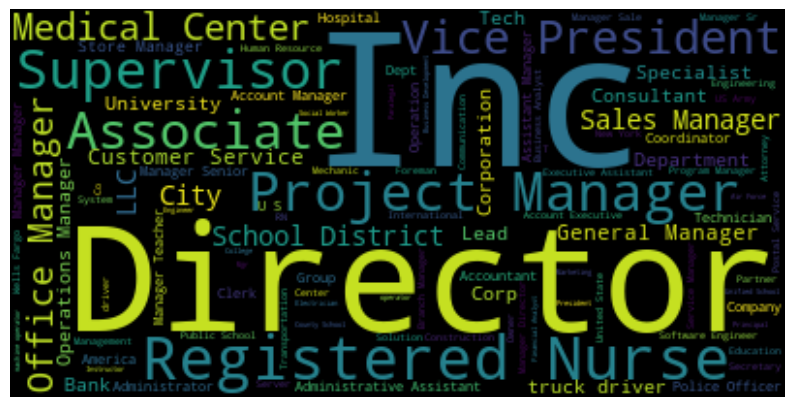

In [135]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud().generate(' '.join(emp for emp in df.emp_title if pd.notnull(emp)))

# Create a figure and plot the word cloud
plt.figure(figsize=(10, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Display the word cloud
plt.show()


In [117]:
selected_columns =  ['grade','term', 'home_ownership', 'verification_status', 'pymnt_plan', 'initial_list_status', 'application_type','loan_grade']

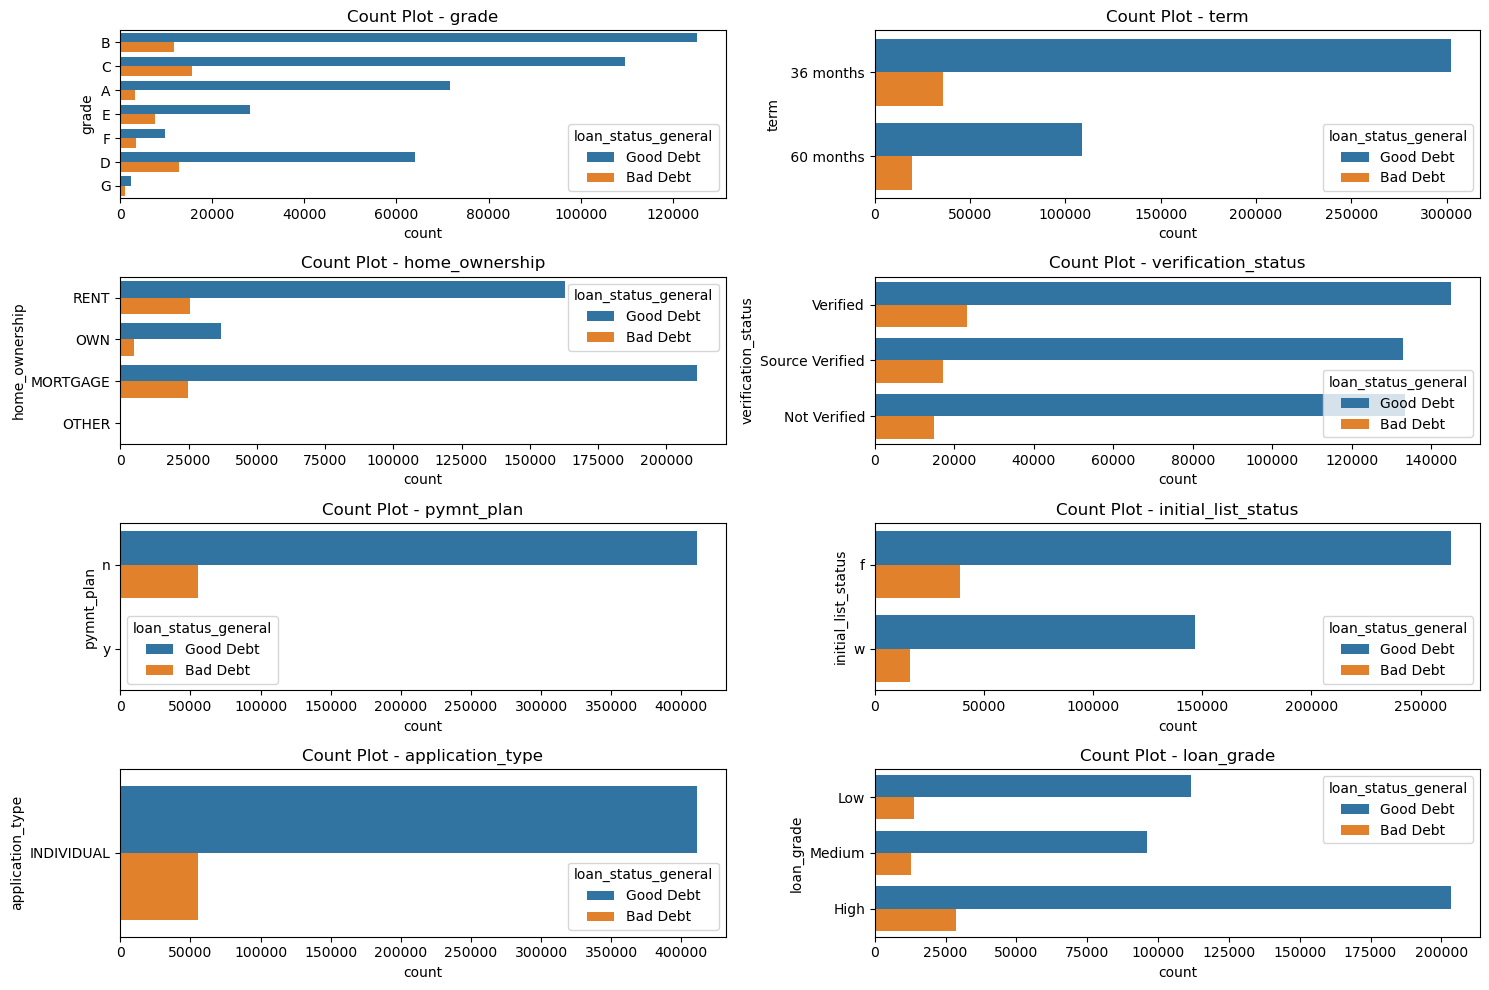

In [118]:
# Determining the number of rows and columns for subplots
num_plots = len(selected_columns)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Setting up a counter for plots
counter = 0

# Creating horizontal count plots for each object column
for row in range(num_rows):
    for col in range(num_cols):
        if counter < num_plots:
            col_name = selected_columns[counter]
            sns.countplot(data=df, y=col_name, ax=axes[row, col], orient='h', hue='loan_status_general')
            axes[row, col].set_title(f"Count Plot - {col_name}")
            counter += 1
        else:
            # If the counter exceeds the number of object columns, remove the remaining subplot
            fig.delaxes(axes[row, col])

# Adjusting the layout of subplots
plt.tight_layout()

# Displaying the plot
plt.show()


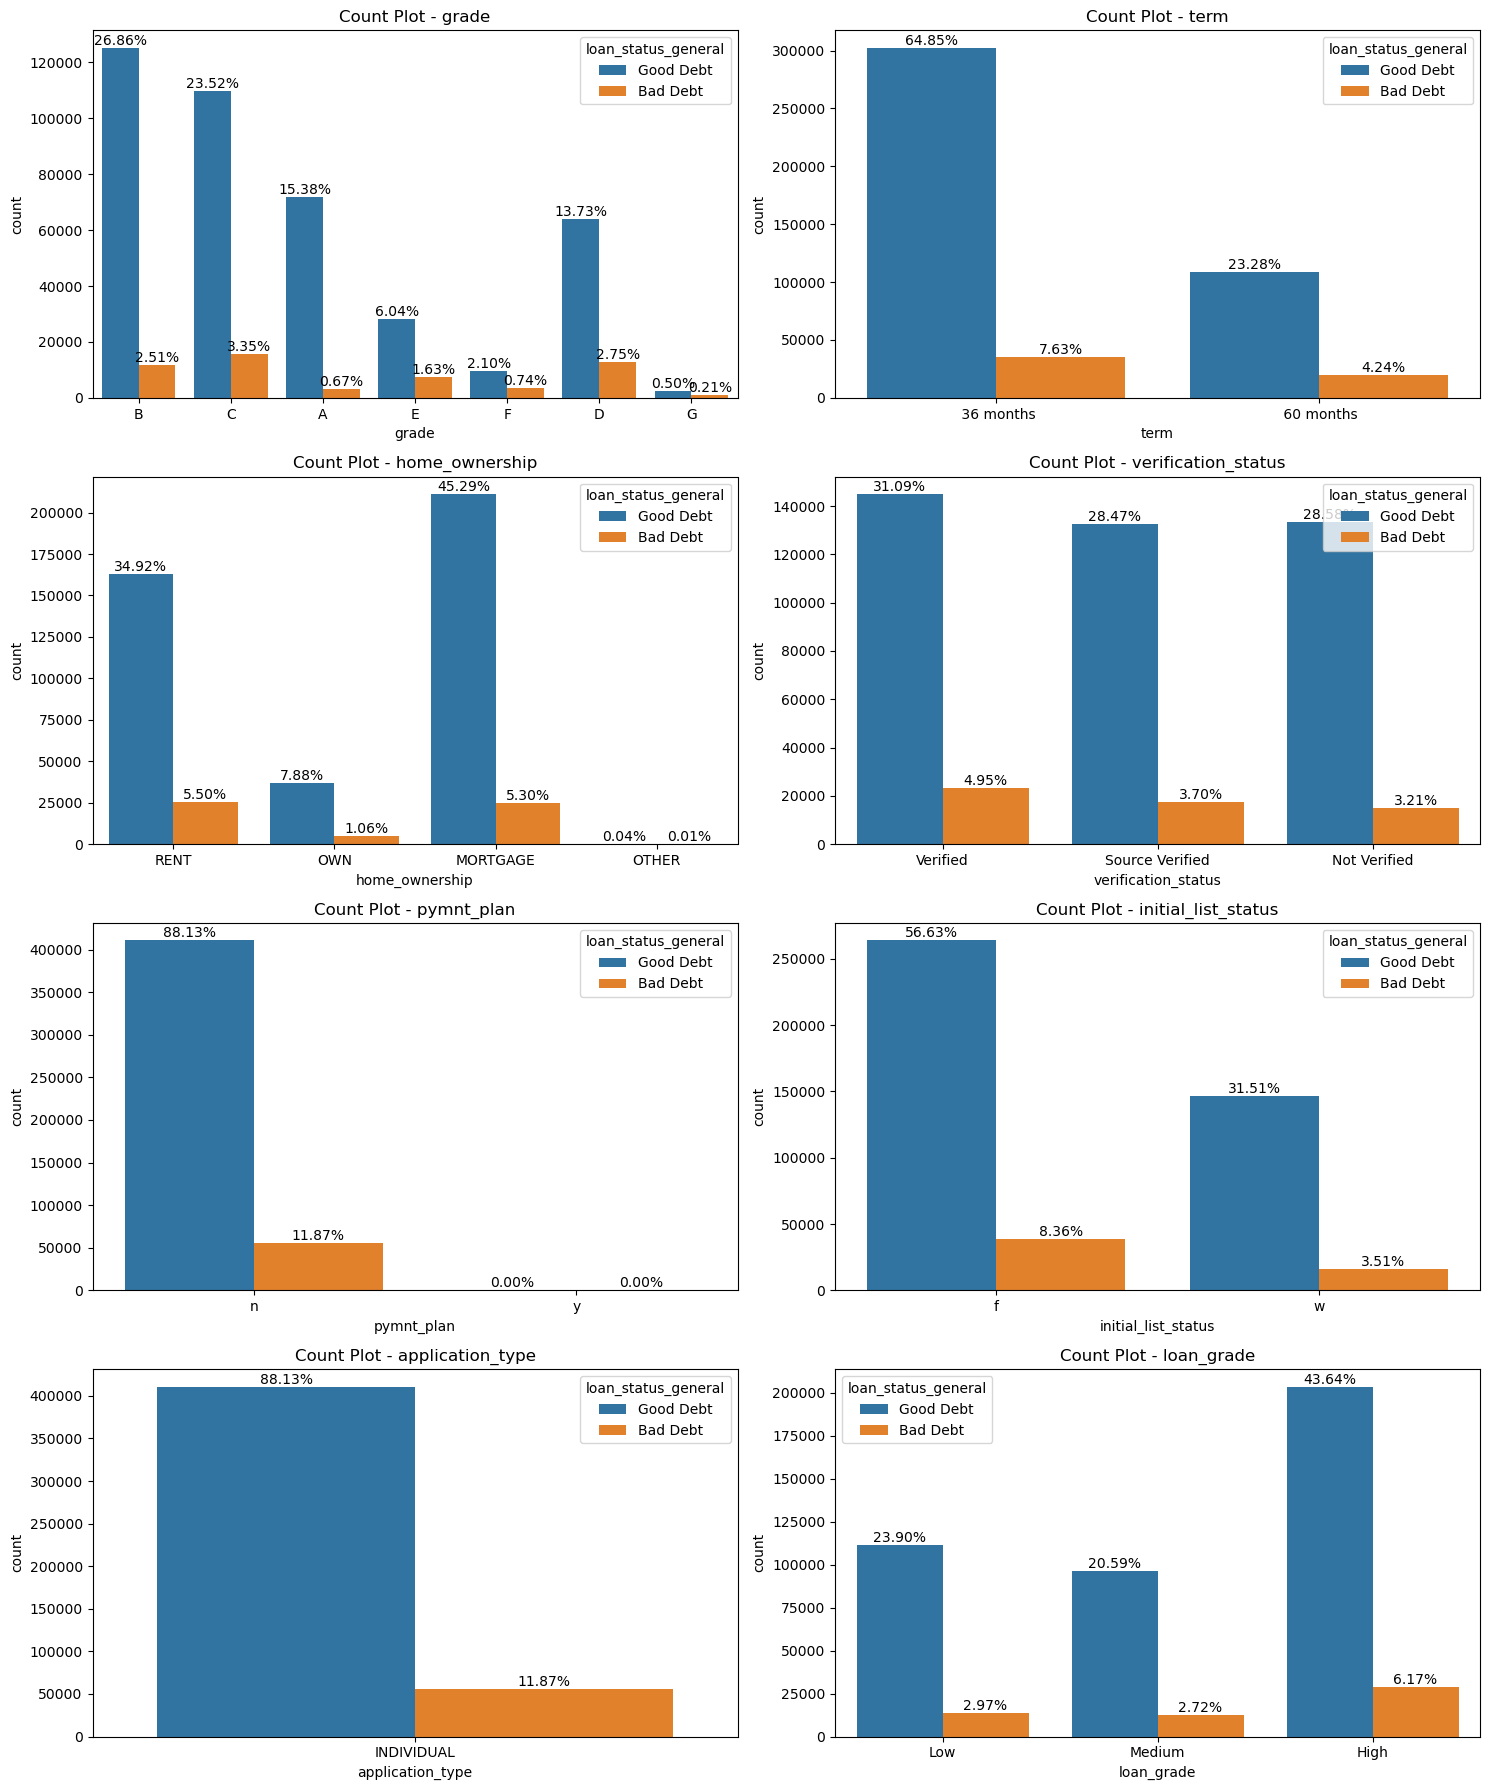

In [119]:
# Determining the number of rows and columns for subplots
num_plots = len(selected_columns)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 18))

# Setting up a counter for plots 
counter = 0

# Creating horizontal count plots for each object column
for row in range(num_rows):
    for col in range(num_cols):
        if counter < num_plots:
            col_name = selected_columns[counter]
            ax = sns.countplot(data=df, x=col_name, ax=axes[row, col], hue='loan_status_general')
            ax.set_title(f"Count Plot - {col_name}")
            total = len(df[df[col_name].notna()])  # Exclude missing values
            for p in ax.patches:
                width = p.get_width()
                height = p.get_height()
                x, y = p.get_xy() 
                percentage = height / total * 100
                ax.annotate(f'{percentage:.2f}%', (x + width/2, y + height), ha='center', va='bottom')
            counter += 1
        else:
            # If the counter exceeds the number of object columns, remove the remaining subplot
            fig.delaxes(axes[row, col])

# Adjusting the layout of subplots
plt.tight_layout()

# Displaying the plot
plt.show()


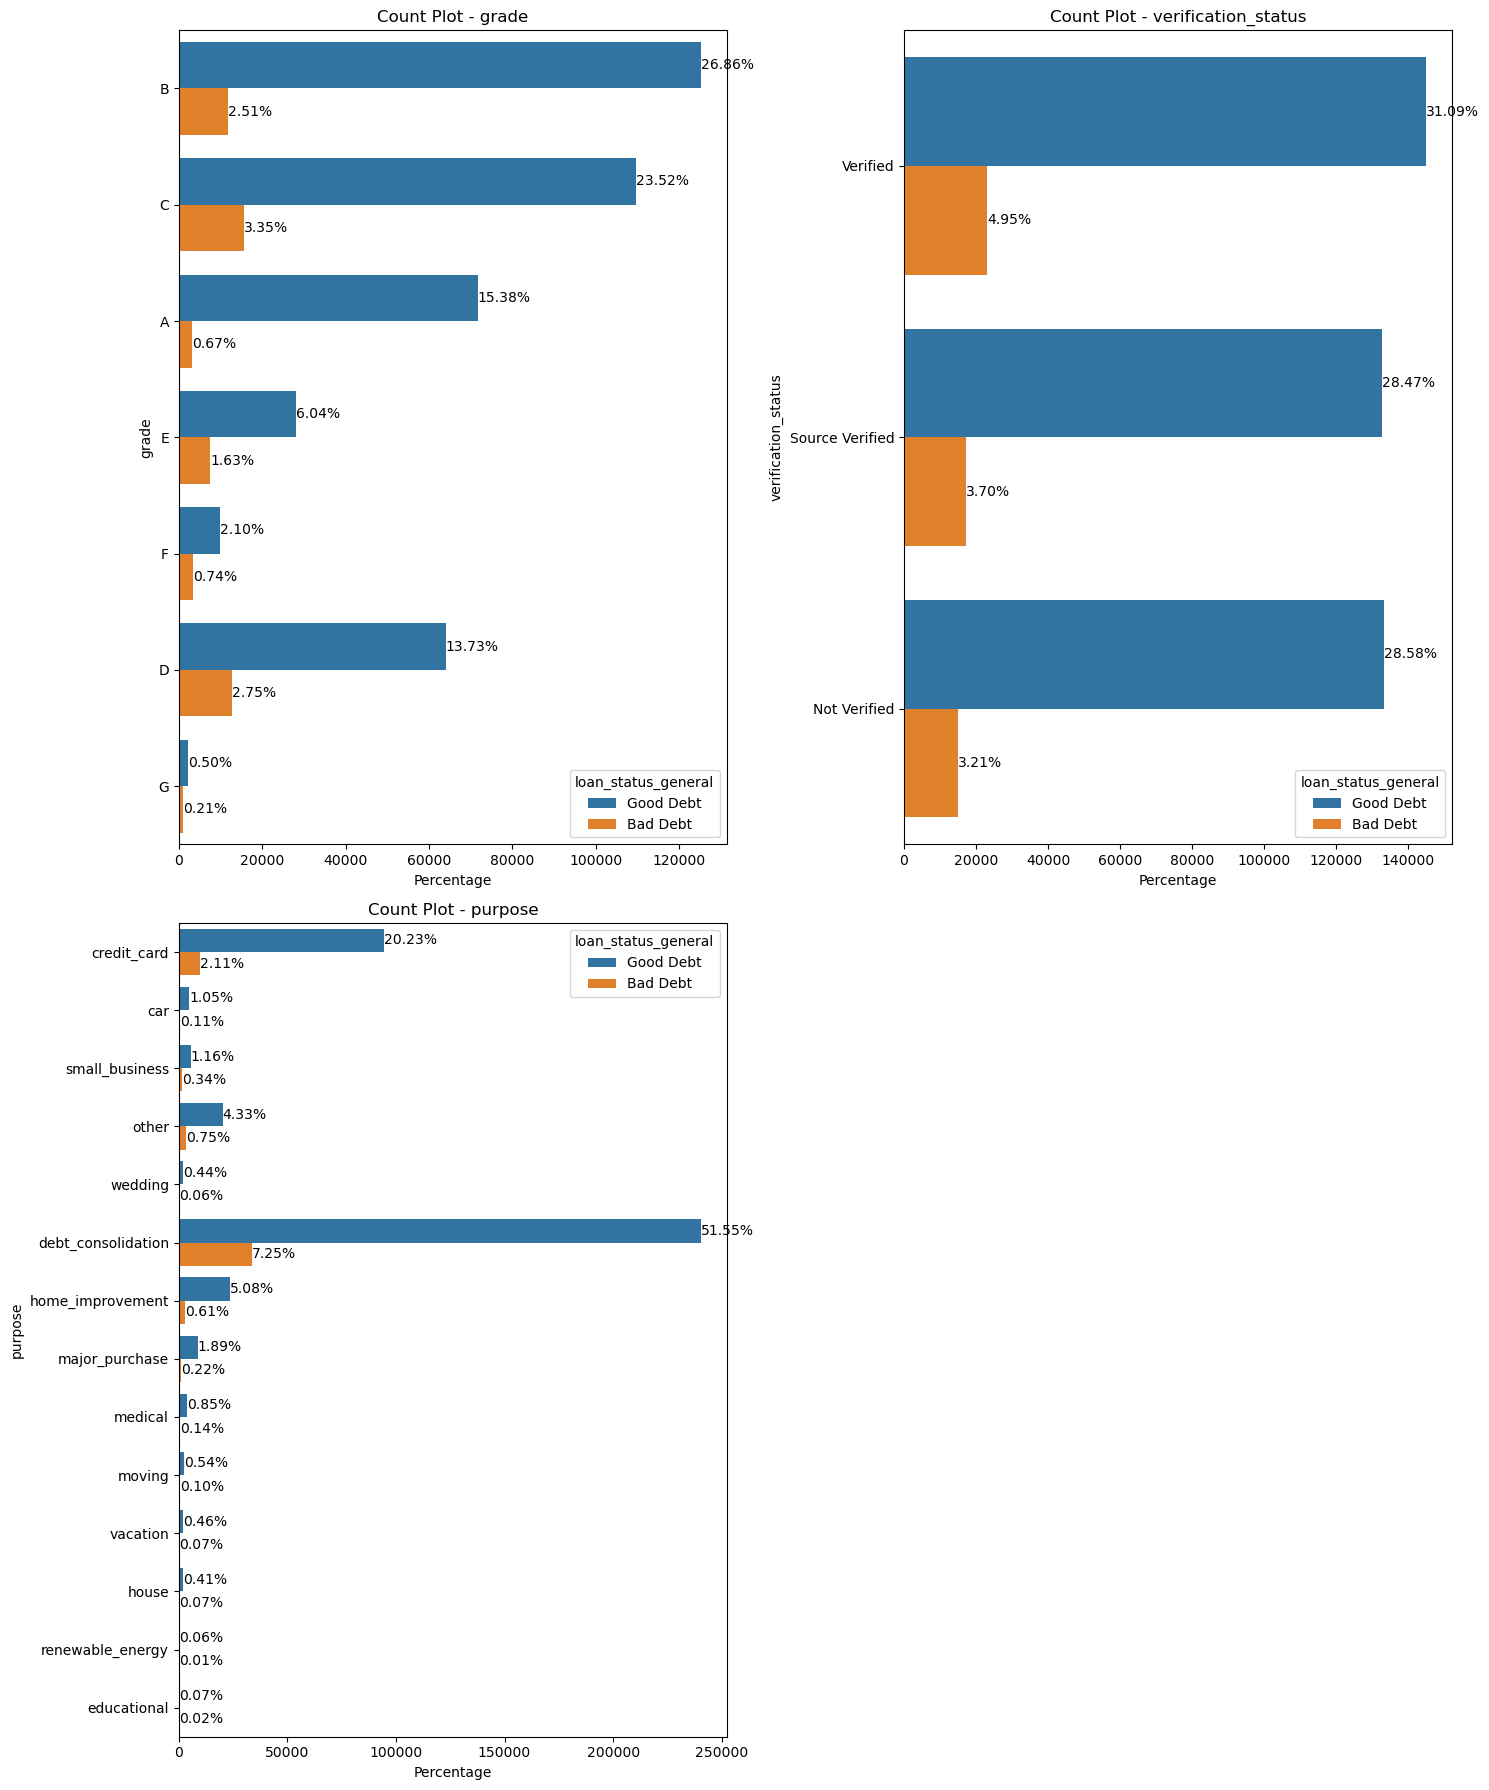

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_columns = ['grade', 'verification_status', 'purpose']

num_plots = len(selected_columns)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 18))

# Setting up a counter for plots
counter = 0

# Creating horizontal count plots for each object column
for row in range(num_rows):
    for col in range(num_cols):
        if counter < num_plots:
            col_name = selected_columns[counter]
            ax = sns.countplot(data=df, y=col_name, ax=axes[row, col], hue='loan_status_general')
            ax.set_title(f"Count Plot - {col_name}")
            total = len(df[df[col_name].notna()])  # Exclude missing values
            for p in ax.patches:
                width = p.get_width()
                height = p.get_height()
                x, y = p.get_xy()
                percentage = width / total * 100
                ax.annotate(f'{percentage:.2f}%', (width, y + height / 2), va='center')
            ax.set_xlabel('Percentage')
            counter += 1
        else:
            # If the counter exceeds the number of object columns, remove the remaining subplot
            fig.delaxes(axes[row, col])

# Adjusting the layout of subplots
plt.tight_layout()

# Displaying the plot
plt.show()


# Modelling

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score

def train_test_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Training the model
    model.fit(X_train, y_train)
    
    # Predicting the labels for test set
    y_pred = model.predict(X_test)
    
    # Calculating evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Printing the evaluation metrics
    print("Training is success!")
    print("Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1-score: {:.2f}".format(
        accuracy, precision, recall, f1
    ))
    
    # Predicting probabilities for test set
    y_pred_proba = model.predict_proba(X_test)
    
    # Printing AUC, KS score, and classification report
    ks, roc_auc = evaluate_ks_and_roc_auc(y_test, y_pred_proba)
    matrix = classification_report(y_test, y_pred)
    print('Classification report:\n', matrix)
    
    # Generating and plotting confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    target_names = ["Approved", "Rejected"]
    plot_confusion_matrix(cm, target_names, title='Confusion Matrix', cmap=None, normalize=False)
    
    # Returning the evaluation metrics and the train/test sets
    return accuracy, precision, recall, f1, X_train, X_test, y_train, y_test

def evaluate_ks_and_roc_auc(y_real, y_proba):
    # Unite both visions to be able to filter
    df = pd.DataFrame()
    df['real'] = y_real
    df['proba'] = y_proba[:, 1]
    
    # Recover each class
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]
    
    ks = ks_2samp(class0['proba'], class1['proba'])
    roc_auc = roc_auc_score(df['real'], df['proba'])
    
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    return ks.statistic, roc_auc

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

## Logistic Regression

Training is success!
Accuracy: 0.87, Precision: 0.87, Recall: 0.82, F1-score: 0.84
ROC AUC: 0.9478
KS: 0.7489 (p-value: 0.000e+00)
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89     80890
           1       0.87      0.82      0.84     58996

    accuracy                           0.87    139886
   macro avg       0.87      0.86      0.87    139886
weighted avg       0.87      0.87      0.87    139886



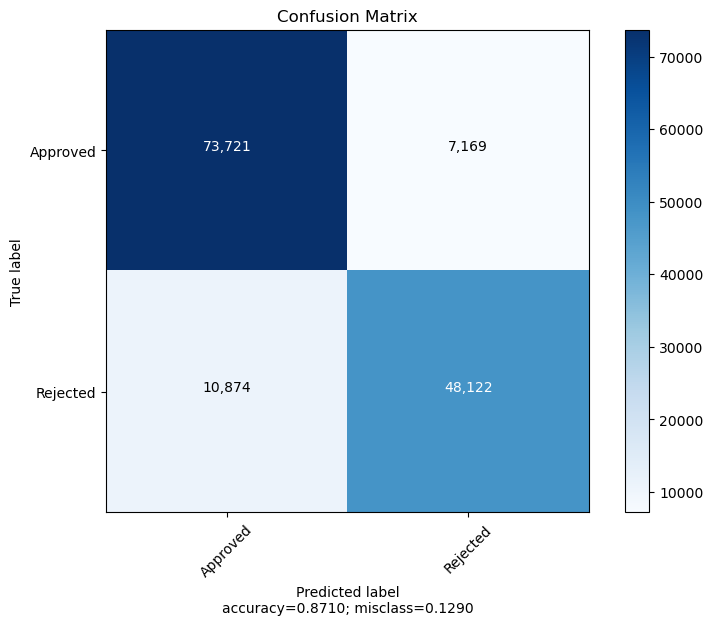

In [57]:
from sklearn.linear_model import LogisticRegression

# Define the modell
model_logistic = LogisticRegression(max_iter=1000)

# Training, testing, and evaluation model
accuracy, precision, recall, f1, _, _, _, _ = train_test_evaluate_model(model_logistic, X_train, X_test, y_train, y_test)

Training is success!
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-score: 1.00
ROC AUC: 0.9999
KS: 0.9989 (p-value: 0.000e+00)
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     80890
           1       1.00      1.00      1.00     58996

    accuracy                           1.00    139886
   macro avg       1.00      1.00      1.00    139886
weighted avg       1.00      1.00      1.00    139886



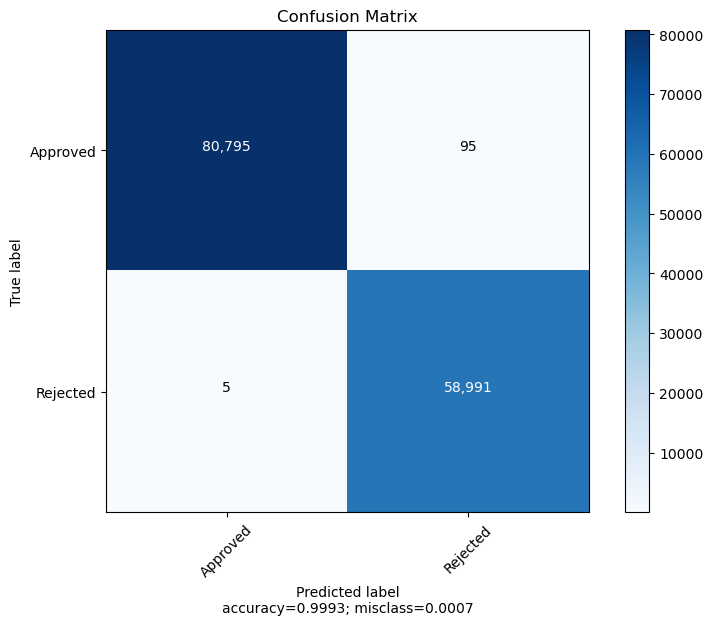

In [140]:
from sklearn.ensemble import GradientBoostingClassifier

# Inisialisasi model Gradient Boosting Classifier
model_GBC = GradientBoostingClassifier()

# Train, test, dan evaluasi model Gradient Boosting Classifier
accuracy, precision, recall, f1, _, _, _, _ = train_test_evaluate_model(model_GBC, X_train, X_test, y_train, y_test)


## Random Forest

Training is success!
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-score: 1.00
ROC AUC: 0.9999
KS: 0.9988 (p-value: 0.000e+00)
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     80890
           1       1.00      1.00      1.00     58996

    accuracy                           1.00    139886
   macro avg       1.00      1.00      1.00    139886
weighted avg       1.00      1.00      1.00    139886



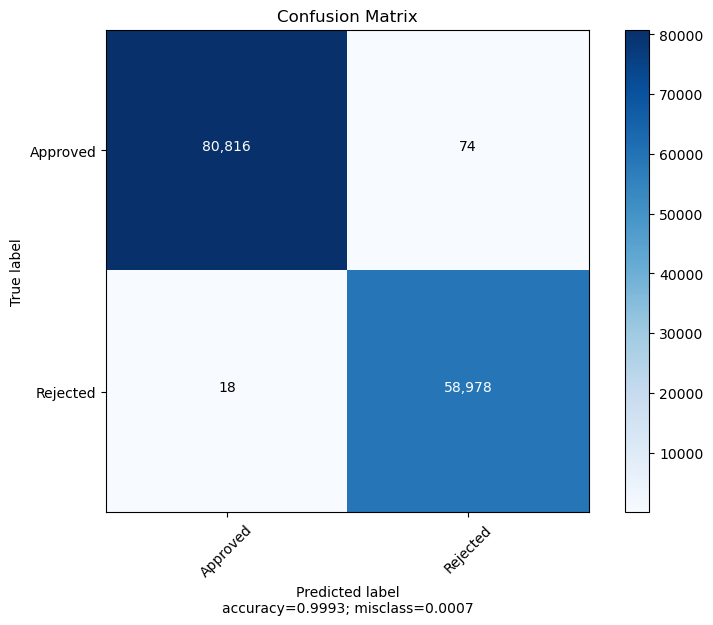

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
model_RF = RandomForestClassifier(random_state=42)

# Train, test, and evaluate the model
accuracy, precision, recall, f1, _, _, _, _ = train_test_evaluate_model(model_RF, X_train, X_test, y_train, y_test)


## Naive Bayes

Training is success!
Accuracy: 0.47, Precision: 0.44, Recall: 0.99, F1-score: 0.61
ROC AUC: 0.8899
KS: 0.6530 (p-value: 0.000e+00)
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.09      0.16     80890
           1       0.44      0.99      0.61     58996

    accuracy                           0.47    139886
   macro avg       0.69      0.54      0.39    139886
weighted avg       0.73      0.47      0.35    139886



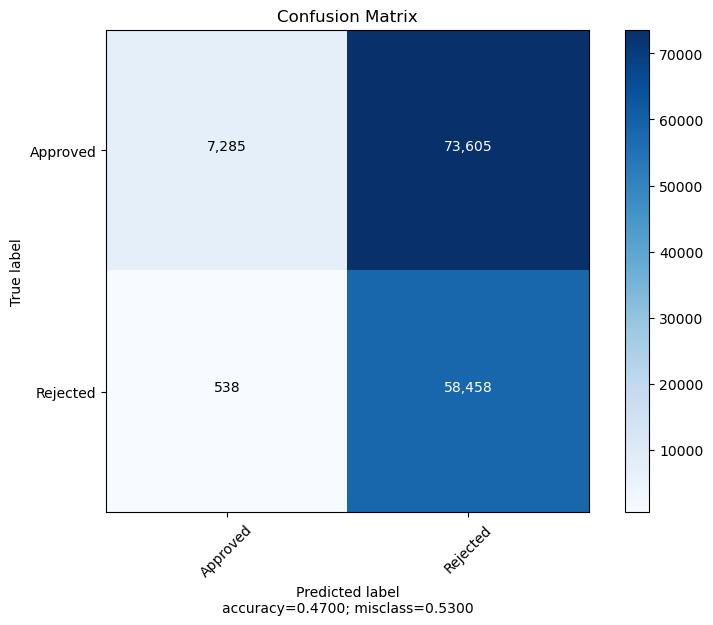

In [49]:
from sklearn.naive_bayes import GaussianNB

# Inisialisasi model Naive Bayes
model_nb = GaussianNB()

# Latih, uji, dan evaluasi model
accuracy, precision, recall, f1, _, _, _, _ = train_test_evaluate_model(model_nb, X_train, X_test, y_train, y_test)


## Multinomial Naive Bayes

Training is success!
Accuracy: 0.56, Precision: 0.48, Recall: 0.53, F1-score: 0.51
ROC AUC: 0.5619
KS: 0.1156 (p-value: 0.000e+00)
Classification report:
               precision    recall  f1-score   support

           0       0.63      0.58      0.61     80890
           1       0.48      0.53      0.51     58996

    accuracy                           0.56    139886
   macro avg       0.56      0.56      0.56    139886
weighted avg       0.57      0.56      0.56    139886



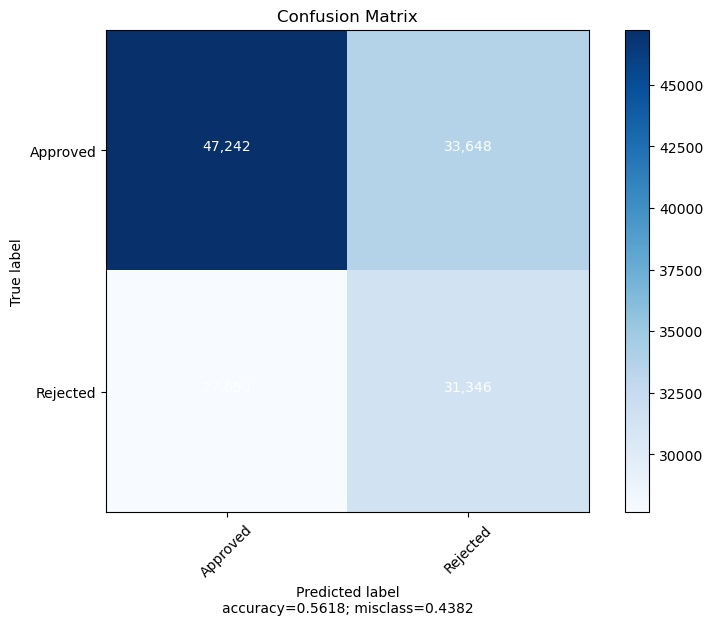

In [50]:
from sklearn.naive_bayes import MultinomialNB

# Define the model
model_mnb = MultinomialNB()

# Latih, uji, dan evaluasi model
accuracy, precision, recall, f1, _, _, _, _ = train_test_evaluate_model(model_mnb, X_train, X_test, y_train, y_test)


Training is success!
Accuracy: 0.67, Precision: 0.58, Recall: 0.82, F1-score: 0.67
ROC AUC: 0.7588
KS: 0.4102 (p-value: 0.000e+00)
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.56      0.66     80890
           1       0.58      0.82      0.67     58996

    accuracy                           0.67    139886
   macro avg       0.69      0.69      0.67    139886
weighted avg       0.71      0.67      0.67    139886



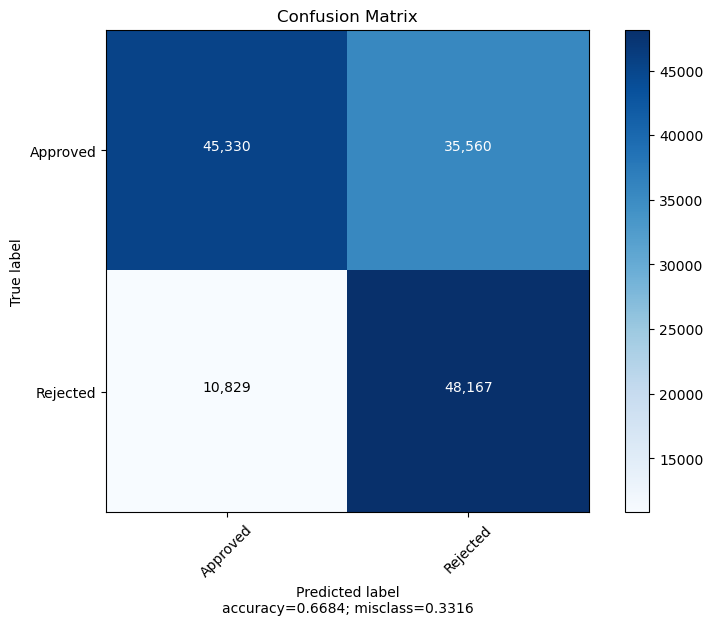

In [231]:
from sklearn.ensemble import VotingClassifier

# Inisialisasi model Logistic Regression
model_LR = LogisticRegression(solver='lbfgs',max_iter=1000)

# Inisialisasi model Multinomial Naive Bayes
model_MNB = MultinomialNB()

# Inisialisasi model Naive Bayes
model_nb = GaussianNB()

# Inisialisasi model Voting Classifier
voting_model = VotingClassifier(
    estimators=[('lr', model_LR), ('mnb', model_MNB), ('nb', model_nb)],
    voting='soft'
)

# Training, testing, dan evaluasi model Voting Classifier
accuracy, precision, recall, f1, _, _, _, _ = train_test_evaluate_model(voting_model, X_train, X_test, y_train, y_test)


# Tuning Hyperparameter

Training is success!
Accuracy: 0.83, Precision: 0.84, Recall: 0.73, F1-score: 0.78
ROC AUC: 0.9139
KS: 0.6656 (p-value: 0.000e+00)
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86     80890
           1       0.84      0.73      0.78     58996

    accuracy                           0.83    139886
   macro avg       0.83      0.81      0.82    139886
weighted avg       0.83      0.83      0.82    139886



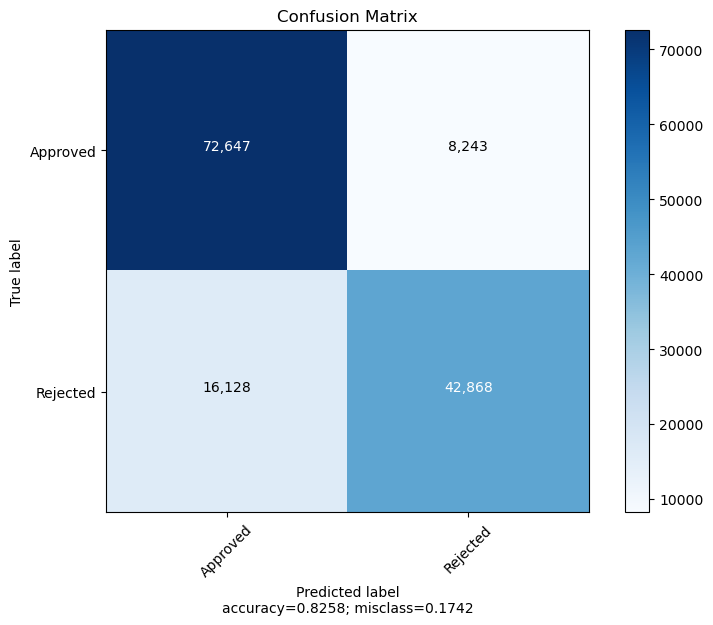

In [75]:
from sklearn.linear_model import LogisticRegression

# Define the model
model_logistic = LogisticRegression(solver='lbfgs', max_iter=2000, penalty='l2', C=0.38)

# Training, testing, and evaluation model
accuracy, precision, recall, f1, _, _, _, _ = train_test_evaluate_model(model_logistic, X_train, X_test, y_train, y_test)


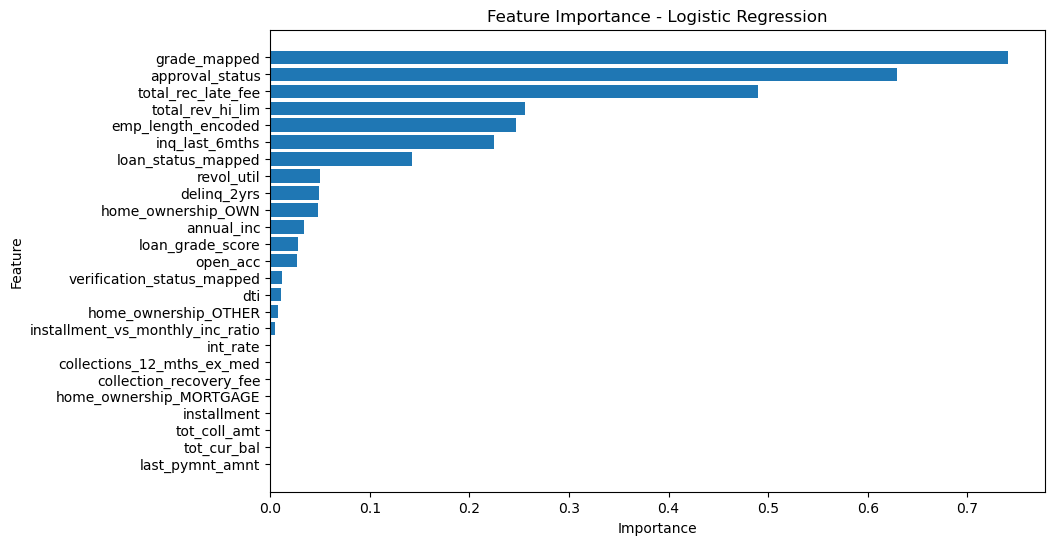

In [58]:
import matplotlib.pyplot as plt

# Get feature coefficients
feature_importance = abs(model_logistic.coef_[0])

# Get feature names
feature_names = selected_columns[:len(feature_importance)]

# Combine features and their importance values
feature_importance_sorted = sorted(zip(feature_names, feature_importance), key=lambda x: x[1])

# Separate sorted feature names and importance values
sorted_feature_names, sorted_feature_importance = zip(*feature_importance_sorted)

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importance)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Logistic Regression")
plt.show()
